## Problem Statement

* **Task 1:-** Prepare a complete data analysis report on the given data.
* **Task 2:-** Explore football skills and cluster football players based on their attributes.
* **Task3:-** Explore the data and attempt all the below asked questions in a
step by step manner:
1. Prepare a rank ordered list of top 10 countries with most players. Which
countries are producing the most footballers that play at this level?
2. Plot the distribution of overall rating vs. age of players. Interpret what is the
age after which a player stops improving?
3. Which type of offensive players tends to get paid the most: the striker, the
right-winger, or the left-winger?

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Load Dataset
pd.set_option('display.max_columns', None)
data=pd.read_csv("players_20.csv")
data

sofifa_id                                         player_url  \
0         158023  https://sofifa.com/player/158023/lionel-messi/...   
1          20801  https://sofifa.com/player/20801/c-ronaldo-dos-...   
2         190871  https://sofifa.com/player/190871/neymar-da-sil...   
3         200389  https://sofifa.com/player/200389/jan-oblak/20/...   
4         183277  https://sofifa.com/player/183277/eden-hazard/2...   
...          ...                                                ...   
18273     245006  https://sofifa.com/player/245006/shuai-shao/20...   
18274     250995  https://sofifa.com/player/250995/mingjie-xiao/...   
18275     252332  https://sofifa.com/player/252332/wei-zhang/20/...   
18276     251110  https://sofifa.com/player/251110/haijian-wang/...   
18277     233449  https://sofifa.com/player/233449/ximing-pan/20...   

              short_name                            long_name  age  \
0               L. Messi       Lionel Andrés Messi Cuccittini   32   
1      Cristiano Ronaldo  Cristiano Ronaldo dos Santos Aveiro   34   
2              Neymar Jr        Neymar da Silva Santos Junior   27   
3               J. Oblak                            Jan Oblak   26   
4              E. Hazard                          Eden Hazard   28   
...                  ...                                  ...  ...   
18273         Shao Shuai                                   邵帅   22   
18274       Xiao Mingjie                         Mingjie Xiao   22   
18275          Zhang Wei                                   张威   19   
18276       Wang Haijian                                  汪海健   18   
18277         Pan Ximing                                  潘喜明   26   

              dob  height_cm  weight_kg nationality  \
0      1987-06-24        170         72   Argentina   
1      1985-02-05        187         83    Portugal   
2      1992-02-05        175         68      Brazil   
3      1993-01-07        188         87    Slovenia   
4      1991-01-07        175         74     Belgium   
...           ...        ...        ...         ...   
18273  1997-03-10        186         79    China PR   
18274  1997-01-01        177         66    China PR   
18275  2000-05-16        186         75    China PR   
18276  2000-08-02        185         74    China PR   
18277  1993-01-11        182         78    China PR   

                                club  overall  potential  value_eur  wage_eur  \
0                       FC Barcelona       94         94   95500000    565000   
1                           Juventus       93         93   58500000    405000   
2                Paris Saint-Germain       92         92  105500000    290000   
3                    Atlético Madrid       91         93   77500000    125000   
4                        Real Madrid       91         91   90000000    470000   
...                              ...      ...        ...        ...       ...   
18273               Beijing Renhe FC       48         56      40000      2000   
18274               Shanghai SIPG FC       48         56      40000      2000   
18275         Hebei China Fortune FC       48         56      40000      1000   
18276  Shanghai Greenland Shenhua FC       48         54      40000      1000   
18277         Hebei China Fortune FC       48         51      40000      2000   

      player_positions preferred_foot  international_reputation  weak_foot  \
0           RW, CF, ST           Left                         5          4   
1               ST, LW          Right                         5          4   
2              LW, CAM          Right                         5          5   
3                   GK          Right                         3          3   
4               LW, CF          Right                         4          4   
...                ...            ...                       ...        ...   
18273               CB          Right                         1          3   
18274               CB          Right                  

### Domain Analysis

* **Name:** Name of the player. 
* **Age:** Age of the player.
* **Height:** Height of the player in inches (transformed to centimeters in preprocessing).
* **Overall:** General performance quality and value of the player representing the key positional skills and international reputation rated between 1-99. 
* **Potential:** Maximum Overall rating expected to be reached by a player in the top of his career rated between 1-99.
* **PreferredFoot:** Right or Left. Label encoder is applied as 0 for left and 1 for right.
* **WeakFoot:** Represents how well a player uses his weak foot (e.g. left for righties) rated between 1 to 5.
* **WorkRate:** Degree of the effort the player puts in terms of attack and defense rated as low, medium and high. This feature is divided into two new features as AttackWorkRate and DefenseWorkRate. Besides, label encoder is applied as 0 for low, 0.5 for medium and 1 for high.
* **Position:** Position of the players on the pitch which determines their roles and responsibilities in the team. Forward positions in the football and FIFA 19 can be grouped as striker (ST: center striker, RS: right striker, LS: left striker), forward (CF: center forward, RF: right forward, LF: left forward) and winger (RW: right winger, LW: left winger). 
* **ST: Positional skill.** Player’s general ability when playing in ST position rated between 1-99.
* **RS: Positional skill.** Player’s general ability when playing in in RS position rated between 1-99.
* **LS: Positional skill.** Player’s general ability when playing in in LS position rated between 1-99.
* **CF: Positional skill.** Player’s general ability when playing in in CF position rated between 1-99.
* **RF: Positional skill.** Player’s general ability when playing in in RF position rated between 1-99.
* **LF: Positional skill.** Player’s general ability when playing in in LF position rated between 1-99.
* **RW: Positional skill.** Player’s general ability when playing in in RW position rated between 1-99.
* **LW: Positional skill.** Player’s general ability when playing in in LW position rated between 1-99.
* **Crossing:** Crossing skill of the player rated between 1-99. Cross is a long-range pass from wings to center.
* **Finishing:** Finishing skill of the player rated between 1-99. Finishing in football refers to finish an attack by scoring a goal.
* **HeadingAccuracy:** Player’s accuracy to pass or shoot by using his head rated between 1-99.
* **ShortPassing:** Player’s accuracy for short passes rated between 1-99.
* **LongPassing:** Player’s accuracy for long passes rated between 1-99.
* **Dribbling:** Dribbling skill of the player rated between 1-99. Dribbling is carrying the ball without losing while moving in one particular direction.
* **SprintSpeed:** Speed rate of the player rated between 1-99.
* **Acceleration:** Shows how fast a player can reach his maximum sprint speed rated between 1-99.
* **FKAccuracy:** Player’s accuracy to score free kick goals rated between 1-99.
* **BallControl:** Player’s ability to control the ball rated between 1-99.
* **Balance:** Player’s ability to remain steady while running, carrying and controlling the ball rated between 1-99.
* **ShotPower:** Player’s strength level of shooting the ball rated between 1-99.
* **Jumping:** Player’s jumping skill rated between 1-99.
* **Penalties:** Player’s accuracy to score goals from penalty rated between 1-99.
* **Strength:** Physical strength of the player rated between 1-99.
* **Agility:** Gracefulness and quickness of the player while controlling the ball rated between 1-99.
* **Reactions:** Acting speed of the player to what happens in his environment rated between 1-99.
* **Aggression:** Aggression level of the player while pushing, pulling and tackling rated between 1-99.
* **Positioning:** Player’s ability to place himself in the right position to receive the ball or score goals rated between 1-99.
* **Vision:** Player’s mental awareness about the other players in the team for passing rated between 1-99.
* **Volleys:** Player’s ability to perform volleys rated between 1-99.
* **LongShots:** Player’s accuracy of shoots from long distances rated between 1-99.
* **Stamina:** Player’s ability to sustain his stamina level during the match rated between 1-99. Players with lower stamina get tired fast.
* **Composure:** Player’s ability to control his calmness and frustration during the match rated between 1-99.
* **Curve:** Player’s ability to curve the ball while passing or shooting rated between 1-99.
* **Interceptions:** Player’s ability to intercept the ball while opposite team’s players are passing rated between 1-99. It is a defensive skill.
* **StandingTackle:** Player’s ability to perform tackle (take the ball from the opposite player) while standing rated between 1-99. It is a defensive skill.
* **SlidingTackle:** Player’s ability to perform tackle by sliding rated between 1-99. It is a defensive skill.
* **Marking:** Player’s ability to apply strategies to prevent opposing team from taking the ball rated between 1-99. It is a defensive skill.  





## Basic Checks

In [3]:
#Head of dataset
data.head()

sofifa_id                                         player_url  \
0     158023  https://sofifa.com/player/158023/lionel-messi/...   
1      20801  https://sofifa.com/player/20801/c-ronaldo-dos-...   
2     190871  https://sofifa.com/player/190871/neymar-da-sil...   
3     200389  https://sofifa.com/player/200389/jan-oblak/20/...   
4     183277  https://sofifa.com/player/183277/eden-hazard/2...   

          short_name                            long_name  age         dob  \
0           L. Messi       Lionel Andrés Messi Cuccittini   32  1987-06-24   
1  Cristiano Ronaldo  Cristiano Ronaldo dos Santos Aveiro   34  1985-02-05   
2          Neymar Jr        Neymar da Silva Santos Junior   27  1992-02-05   
3           J. Oblak                            Jan Oblak   26  1993-01-07   
4          E. Hazard                          Eden Hazard   28  1991-01-07   

   height_cm  weight_kg nationality                 club  overall  potential  \
0        170         72   Argentina         FC Barcelona       94         94   
1        187         83    Portugal             Juventus       93         93   
2        175         68      Brazil  Paris Saint-Germain       92         92   
3        188         87    Slovenia      Atlético Madrid       91         93   
4        175         74     Belgium          Real Madrid       91         91   

   value_eur  wage_eur player_positions preferred_foot  \
0   95500000    565000       RW, CF, ST           Left   
1   58500000    405000           ST, LW          Right   
2  105500000    290000          LW, CAM          Right   
3   77500000    125000               GK          Right   
4   90000000    470000           LW, CF          Right   

   international_reputation  weak_foot  skill_moves      work_rate  \
0                         5          4            4     Medium/Low   
1                         5          4            5       High/Low   
2                         5          5            5    High/Medium   
3                         3          3            1  Medium/Medium   
4                         4          4            4    High/Medium   

    body_type real_face  release_clause_eur  \
0       Messi       Yes         195800000.0   
1  C. Ronaldo       Yes          96500000.0   
2      Neymar       Yes         195200000.0   
3      Normal       Yes         164700000.0   
4      Normal       Yes         184500000.0   

                                         player_tags team_position  \
0  #Dribbler, #Distance Shooter, #Crosser, #FK Sp...            RW   
1  #Speedster, #Dribbler, #Distance Shooter, #Acr...            LW   
2  #Speedster, #Dribbler, #Playmaker  , #Crosser,...           CAM   
3                                                NaN            GK   
4                    #Speedster, #Dribbler, #Acrobat            LW   

   team_jersey_number loaned_from      joined  contract_valid_until  \
0                10.0         NaN  2004-07-01                2021.0   
1                 7.0         NaN  2018-07-10                2022.0   
2                10.0         NaN  2017-08-03                2022.0   
3                13.0         NaN  2014-07-16                2023.0   
4                 7.0         NaN  2019-07-01                2024.0   

  nation_position  nation_jersey_number  pace  shooting  passing  dribbling  \
0             NaN                   NaN  87.0      92.0     92.0       96.0   
1              LS                   7.0  90.0      93.0     82.0       89.0   
2              LW                  10.0  91.0      85.0     87.0       95.0   
3              GK                   1.0   NaN       NaN      NaN        NaN   
4              LF                  10.0  91.0      83.0     86.0       94.0   

   defending  physic  gk_diving  gk_handling  gk_kicking  gk_reflexes  \
0       39.0    66.0        NaN          NaN         NaN          NaN   
1       35.0    78.0        NaN          NaN         NaN          NaN   
2       32.0    58.0        NaN          NaN         Na

In [4]:
# Tail of Dataset
data.tail()

sofifa_id                                         player_url  \
18273     245006  https://sofifa.com/player/245006/shuai-shao/20...   
18274     250995  https://sofifa.com/player/250995/mingjie-xiao/...   
18275     252332  https://sofifa.com/player/252332/wei-zhang/20/...   
18276     251110  https://sofifa.com/player/251110/haijian-wang/...   
18277     233449  https://sofifa.com/player/233449/ximing-pan/20...   

         short_name     long_name  age         dob  height_cm  weight_kg  \
18273    Shao Shuai            邵帅   22  1997-03-10        186         79   
18274  Xiao Mingjie  Mingjie Xiao   22  1997-01-01        177         66   
18275     Zhang Wei            张威   19  2000-05-16        186         75   
18276  Wang Haijian           汪海健   18  2000-08-02        185         74   
18277    Pan Ximing           潘喜明   26  1993-01-11        182         78   

      nationality                           club  overall  potential  \
18273    China PR               Beijing Renhe FC       48         56   
18274    China PR               Shanghai SIPG FC       48         56   
18275    China PR         Hebei China Fortune FC       48         56   
18276    China PR  Shanghai Greenland Shenhua FC       48         54   
18277    China PR         Hebei China Fortune FC       48         51   

       value_eur  wage_eur player_positions preferred_foot  \
18273      40000      2000               CB          Right   
18274      40000      2000               CB          Right   
18275      40000      1000               CM          Right   
18276      40000      1000               CM          Right   
18277      40000      2000               CM          Right   

       international_reputation  weak_foot  skill_moves      work_rate  \
18273                         1          3            2    Medium/High   
18274                         1          2            2  Medium/Medium   
18275                         1          2            2     Low/Medium   
18276                         1          2            2        Low/Low   
18277                         1          3            2  Medium/Medium   

      body_type real_face  release_clause_eur player_tags team_position  \
18273    Normal        No             70000.0         NaN           RES   
18274    Normal        No             72000.0         NaN           SUB   
18275      Lean        No             70000.0         NaN           SUB   
18276      Lean        No             70000.0         NaN           SUB   
18277    Normal        No                 NaN         NaN           SUB   

       team_jersey_number      loaned_from      joined  contract_valid_until  \
18273                36.0              NaN  2018-07-13                2019.0   
18274                31.0              NaN  2019-02-01                2022.0   
18275                38.0              NaN  2019-01-01                2019.0   
18276                33.0              NaN  2019-02-01                2022.0   
18277                37.0  Tianjin TEDA FC         NaN                2019.0   

      nation_position  nation_jersey_number  pace  shooting  passing  \
18273             NaN                   NaN  57.0      23.0     28.0   
18274             NaN                   NaN  58.0      24.0     33.0   
18275             NaN                   NaN  54.0      35.0     44.0   
18276             NaN                   NaN  59.0      35.0     47.0   
18277             NaN                   NaN  60.0      32.0     51.0   

       dribbling  defending  physic  gk_diving  gk_handling  gk_kicking  \
18273       33.0       47.0    51.0        NaN          NaN         NaN   
18274       35.0       48.0    48.0        NaN          NaN         NaN   
18275       45.0       48.0    51.0        NaN          NaN         NaN   
18276       47.0       45.0    52.0        NaN          NaN         NaN   
18277       45.0       47.0    55.0        NaN          NaN         NaN   

       gk_reflexes  gk_speed  gk_positioning player_trai

In [5]:
# columns
cols=data.columns
print(list(cols))

['sofifa_id', 'player_url', 'short_name', 'long_name', 'age', 'dob', 'height_cm', 'weight_kg', 'nationality', 'club', 'overall', 'potential', 'value_eur', 'wage_eur', 'player_positions', 'preferred_foot', 'international_reputation', 'weak_foot', 'skill_moves', 'work_rate', 'body_type', 'real_face', 'release_clause_eur', 'player_tags', 'team_position', 'team_jersey_number', 'loaned_from', 'joined', 'contract_valid_until', 'nation_position', 'nation_jersey_number', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic', 'gk_diving', 'gk_handling', 'gk_kicking', 'gk_reflexes', 'gk_speed', 'gk_positioning', 'player_traits', 'attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy', 'attacking_short_passing', 'attacking_volleys', 'skill_dribbling', 'skill_curve', 'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed', 'movement_agility', 'movement_reactions', 'movement_balance', 'power_shot_power', 'power_

In [6]:
# categorical columns
cat_cols=data.select_dtypes(include="object")
cat_cols

player_url         short_name  \
0      https://sofifa.com/player/158023/lionel-messi/...           L. Messi   
1      https://sofifa.com/player/20801/c-ronaldo-dos-...  Cristiano Ronaldo   
2      https://sofifa.com/player/190871/neymar-da-sil...          Neymar Jr   
3      https://sofifa.com/player/200389/jan-oblak/20/...           J. Oblak   
4      https://sofifa.com/player/183277/eden-hazard/2...          E. Hazard   
...                                                  ...                ...   
18273  https://sofifa.com/player/245006/shuai-shao/20...         Shao Shuai   
18274  https://sofifa.com/player/250995/mingjie-xiao/...       Xiao Mingjie   
18275  https://sofifa.com/player/252332/wei-zhang/20/...          Zhang Wei   
18276  https://sofifa.com/player/251110/haijian-wang/...       Wang Haijian   
18277  https://sofifa.com/player/233449/ximing-pan/20...         Pan Ximing   

                                 long_name         dob nationality  \
0           Lionel Andrés Messi Cuccittini  1987-06-24   Argentina   
1      Cristiano Ronaldo dos Santos Aveiro  1985-02-05    Portugal   
2            Neymar da Silva Santos Junior  1992-02-05      Brazil   
3                                Jan Oblak  1993-01-07    Slovenia   
4                              Eden Hazard  1991-01-07     Belgium   
...                                    ...         ...         ...   
18273                                   邵帅  1997-03-10    China PR   
18274                         Mingjie Xiao  1997-01-01    China PR   
18275                                   张威  2000-05-16    China PR   
18276                                  汪海健  2000-08-02    China PR   
18277                                  潘喜明  1993-01-11    China PR   

                                club player_positions preferred_foot  \
0                       FC Barcelona       RW, CF, ST           Left   
1                           Juventus           ST, LW          Right   
2                Paris Saint-Germain          LW, CAM          Right   
3                    Atlético Madrid               GK          Right   
4                        Real Madrid           LW, CF          Right   
...                              ...              ...            ...   
18273               Beijing Renhe FC               CB          Right   
18274               Shanghai SIPG FC               CB          Right   
18275         Hebei China Fortune FC               CM          Right   
18276  Shanghai Greenland Shenhua FC               CM          Right   
18277         Hebei China Fortune FC               CM          Right   

           work_rate   body_type real_face  \
0         Medium/Low       Messi       Yes   
1           High/Low  C. Ronaldo       Yes   
2        High/Medium      Neymar       Yes   
3      Medium/Medium      Normal       Yes   
4        High/Medium      Normal       Yes   
...              ...         ...       ...   
18273    Medium/High      Normal        No   
18274  Medium/Medium      Normal        No   
18275     Low/Medium        Lean        No   
18276        Low/Low        Lean        No   
18277  Medium/Medium      Normal        No   

                                             player_tags team_position  \
0      #Dribbler, #Distance Shooter, #Crosser, #FK Sp...            RW   
1      #Speedster, #Dribbler, #Distance Shooter, #Acr...            LW   
2      #Speedster, #Dribbler, #Playmaker  , #Crosser,...           CAM   
3                                                    NaN            GK   
4                        #Speedster, #Dribbler, #Acrobat            LW   
...                                                  ...           ...   
18273                                                NaN           RES   
18274                                                NaN           SUB   
18275                                                NaN           SUB   
18276                                                NaN           SUB   
18277                   

In [7]:
#Numerical columns
num_cols=data.select_dtypes(include=["float64","int64"])
num_cols

sofifa_id  age  height_cm  weight_kg  overall  potential  value_eur  \
0         158023   32        170         72       94         94   95500000   
1          20801   34        187         83       93         93   58500000   
2         190871   27        175         68       92         92  105500000   
3         200389   26        188         87       91         93   77500000   
4         183277   28        175         74       91         91   90000000   
...          ...  ...        ...        ...      ...        ...        ...   
18273     245006   22        186         79       48         56      40000   
18274     250995   22        177         66       48         56      40000   
18275     252332   19        186         75       48         56      40000   
18276     251110   18        185         74       48         54      40000   
18277     233449   26        182         78       48         51      40000   

       wage_eur  international_reputation  weak_foot  skill_moves  \
0        565000                         5          4            4   
1        405000                         5          4            5   
2        290000                         5          5            5   
3        125000                         3          3            1   
4        470000                         4          4            4   
...         ...                       ...        ...          ...   
18273      2000                         1          3            2   
18274      2000                         1          2            2   
18275      1000                         1          2            2   
18276      1000                         1          2            2   
18277      2000                         1          3            2   

       release_clause_eur  team_jersey_number  contract_valid_until  \
0             195800000.0                10.0                2021.0   
1              96500000.0                 7.0                2022.0   
2             195200000.0                10.0                2022.0   
3             164700000.0                13.0                2023.0   
4             184500000.0                 7.0                2024.0   
...                   ...                 ...                   ...   
18273             70000.0                36.0                2019.0   
18274             72000.0                31.0                2022.0   
18275             70000.0                38.0                2019.0   
18276             70000.0                33.0                2022.0   
18277                 NaN                37.0                2019.0   

       nation_jersey_number  pace  shooting  passing  dribbling  defending  \
0                       NaN  87.0      92.0     92.0       96.0       39.0   
1                       7.0  90.0      93.0     82.0       89.0       35.0   
2                      10.0  91.0      85.0     87.0       95.0       32.0   
3                       1.0   NaN       NaN      NaN        NaN        NaN   
4                      10.0  91.0      83.0     86.0       94.0       35.0   
...                     ...   ...       ...      ...        ...        ...   
18273                   NaN  57.0      23.0     28.0       33.0       47.0   
18274                   NaN  58.0      24.0     33.0       35.0       48.0   
18275                   NaN  54.0      35.0     44.0       45.0       48.0   
18276                   NaN  59.0      35.0     47.0       47.0       45.0   
18277                   NaN  60.0      32.0     51.0       45.0       47.0   

       physic  gk_diving  gk_handling  gk_kicking  gk_reflexes  gk_speed  \
0        66.0        NaN          NaN         NaN          NaN       NaN   
1        78.0        NaN          NaN         NaN          NaN       NaN   
2        58.0        NaN          NaN         NaN          NaN       NaN   
3         NaN       87.0         92.0        78.0         89.0      52.0   
4        66.0        NaN          NaN         NaN          NaN       Na

In [8]:
#shape
data.shape

(18278, 104)

In [9]:
#memory usage
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18278 entries, 0 to 18277
Columns: 104 entries, sofifa_id to rb
dtypes: float64(16), int64(45), object(43)
memory usage: 14.5+ MB


In [10]:
#stastical analysis of numrical column
data.describe()

sofifa_id           age     height_cm     weight_kg       overall  \
count   18278.000000  18278.000000  18278.000000  18278.000000  18278.000000   
mean   219738.864482     25.283291    181.362184     75.276343     66.244994   
std     27960.200461      4.656964      6.756961      7.047744      6.949953   
min       768.000000     16.000000    156.000000     50.000000     48.000000   
25%    204445.500000     22.000000    177.000000     70.000000     62.000000   
50%    226165.000000     25.000000    181.000000     75.000000     66.000000   
75%    240795.750000     29.000000    186.000000     80.000000     71.000000   
max    252905.000000     42.000000    205.000000    110.000000     94.000000   

          potential     value_eur       wage_eur  international_reputation  \
count  18278.000000  1.827800e+04   18278.000000              18278.000000   
mean      71.546887  2.484038e+06    9456.942773                  1.103184   
std        6.139669  5.585481e+06   21351.714095                  0.378861   
min       49.000000  0.000000e+00       0.000000                  1.000000   
25%       67.000000  3.250000e+05    1000.000000                  1.000000   
50%       71.000000  7.000000e+05    3000.000000                  1.000000   
75%       75.000000  2.100000e+06    8000.000000                  1.000000   
max       95.000000  1.055000e+08  565000.000000                  5.000000   

          weak_foot   skill_moves  release_clause_eur  team_jersey_number  \
count  18278.000000  18278.000000        1.698000e+04        18038.000000   
mean       2.944250      2.368038        4.740717e+06           20.103892   
std        0.664656      0.765038        1.103002e+07           16.603639   
min        1.000000      1.000000        1.300000e+04            1.000000   
25%        3.000000      2.000000        5.630000e+05            9.000000   
50%        3.000000      2.000000        1.200000e+06           17.000000   
75%        3.000000      3.000000        3.700000e+06           27.000000   
max        5.000000      5.000000        1.958000e+08           99.000000   

       contract_valid_until  nation_jersey_number          pace      shooting  \
count          18038.000000           1126.000000  16242.000000  16242.000000   
mean            2021.114591             12.114565     67.700899     52.298301   
std                1.289888              6.735922     11.297656     14.029418   
min             2019.000000              1.000000     24.000000     15.000000   
25%             2020.000000              6.000000     61.000000     42.000000   
50%             2021.000000             12.000000     69.000000     54.000000   
75%             2022.000000             18.000000     75.000000     63.000000   
max             2026.000000             30.000000     96.000000     93.000000   

            passing     dribbling     defending        physic    gk_diving  \
count  16242.000000  16242.000000  16242.000000  16242.000000  2036.000000   
mean      57.233777     62.531585     51.553503     64.876678    65.422397   
std       10.407844     10.284950     16.419528      9.760162     7.736278   
min       24.000000     23.000000     15.000000     27.000000    44.000000   
25%       50.000000     57.000000     36.000000     59.000000    60.000000   
50%       58.000000     64.000000     56.000000     66.000000    65.000000   
75%       64.000000     69.000000     65.000000     72.000000    70.000000   
max       92.000000     96.000000     90.000000     90.000000    90.000000   

       gk_handling   gk_kicking  gk_reflexes     gk_speed  gk_positioning  \
count  2036.000000  2036.000000  2036.000000  2036.000000     2036.000000   
mean     63.146365    61.832515    66.390472    37.798625       63.374754   
std       7.244023     7.510709     8.154062    10.634038        8.447876   
min      42.000000    35.000000    45.000000    12.000000       41.000000   
25%      58.000000    57.000000    60.750000    29.000000       58.000000  

In [11]:
#stastical analysis of categorical column
data.describe(include="O").T

count unique  \
player_url        18278  18278   
short_name        18278  17354   
long_name         18278  18218   
dob               18278   6142   
nationality       18278    162   
club              18278    698   
player_positions  18278    643   
preferred_foot    18278      2   
work_rate         18278      9   
body_type         18278     10   
real_face         18278      2   
player_tags        1499     83   
team_position     18038     29   
loaned_from        1048    316   
joined            16990   1760   
nation_position    1126     26   
player_traits      7566    921   
ls                16242     94   
st                16242     94   
rs                16242     94   
lw                16242    107   
lf                16242    103   
cf                16242    103   
rf                16242    103   
rw                16242    107   
lam               16242    103   
cam               16242    103   
ram               16242    103   
lm                16242    100   
lcm               16242     88   
cm                16242     88   
rcm               16242     88   
rm                16242    100   
lwb               16242     98   
ldm               16242     98   
cdm               16242     98   
rdm               16242     98   
rwb               16242     98   
lb                16242     96   
lcb               16242    110   
cb                16242    110   
rcb               16242    110   
rb                16242     96   

                                                                top   freq  
player_url        https://sofifa.com/player/158023/lionel-messi/...      1  
short_name                                             J. Rodríguez     11  
long_name                                                Liam Kelly      3  
dob                                                      1992-02-29    113  
nationality                                                 England   1667  
club                                                   FC Barcelona     33  
player_positions                                                 CB   2322  
preferred_foot                                                Right  13960  
work_rate                                             Medium/Medium   9875  
body_type                                                    Normal  10750  
real_face                                                        No  16310  
player_tags                                               #Strength    514  
team_position                                                   SUB   7820  
loaned_from                                                Sassuolo     17  
joined                                                   2019-07-01   1465  
nation_position                                                 SUB    587  
player_traits                                         Early Crosser    501  
ls                                                             61+2    725  
st                                                             61+2    725  
rs                                                             61+2    725  
lw                                                             63+2    736  
lf                                                             63+2    727  
cf                                                             63+2    727  
rf                                                             63+2    727  
rw                                                             63+2    736  
lam                                                            61+2    748  
cam                                                            61+2    748  
ram                                                            61+2    748  
lm                                                             61+2    809  
lcm                                                            58+2    775  
cm                                                             58+2    775  
rcm                                                      

## Data cleaning

In [12]:
# Split the column and remove the '+' with the values after them
columns = ['ls', 'st', 'rs', 'lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam', 'ram', 'lm', 'lcm', 'cm', 'rcm',
           'rm', 'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb']


for column in columns: # for itertion of columns
    data[column] = data[column].str.split('+',expand=True)[0] # Split of string
data.head(1)

sofifa_id                                         player_url short_name  \
0     158023  https://sofifa.com/player/158023/lionel-messi/...   L. Messi   

                        long_name  age         dob  height_cm  weight_kg  \
0  Lionel Andrés Messi Cuccittini   32  1987-06-24        170         72   

  nationality          club  overall  potential  value_eur  wage_eur  \
0   Argentina  FC Barcelona       94         94   95500000    565000   

  player_positions preferred_foot  international_reputation  weak_foot  \
0       RW, CF, ST           Left                         5          4   

   skill_moves   work_rate body_type real_face  release_clause_eur  \
0            4  Medium/Low     Messi       Yes         195800000.0   

                                         player_tags team_position  \
0  #Dribbler, #Distance Shooter, #Crosser, #FK Sp...            RW   

   team_jersey_number loaned_from      joined  contract_valid_until  \
0                10.0         NaN  2004-07-01                2021.0   

  nation_position  nation_jersey_number  pace  shooting  passing  dribbling  \
0             NaN                   NaN  87.0      92.0     92.0       96.0   

   defending  physic  gk_diving  gk_handling  gk_kicking  gk_reflexes  \
0       39.0    66.0        NaN          NaN         NaN          NaN   

   gk_speed  gk_positioning  \
0       NaN             NaN   

                                       player_traits  attacking_crossing  \
0  Beat Offside Trap, Argues with Officials, Earl...                  88   

   attacking_finishing  attacking_heading_accuracy  attacking_short_passing  \
0                   95                          70                       92   

   attacking_volleys  skill_dribbling  skill_curve  skill_fk_accuracy  \
0                 88               97           93                 94   

   skill_long_passing  skill_ball_control  movement_acceleration  \
0                  92                  96                     91   

   movement_sprint_speed  movement_agility  movement_reactions  \
0                     84                93                  95   

   movement_balance  power_shot_power  power_jumping  power_stamina  \
0                95                86             68             75   

   power_strength  power_long_shots  mentality_aggression  \
0              68                94                    48   

   mentality_interceptions  mentality_positioning  mentality_vision  \
0                       40                     94                94   

   mentality_penalties  mentality_composure  defending_marking  \
0                   75                   96                 33   

   defending_standing_tackle  defending_sliding_tackle  goalkeeping_diving  \
0                         37                        26                   6   

   goalkeeping_handling  goalkeeping_kicking  goalkeeping_positioning  \
0                    11                   15                       14   

   goalkeeping_reflexes  ls  st  rs  lw  lf  cf  rf  rw lam cam ram  lm lcm  \
0                     8  89  89  89  93  93  93  93  93  93  93  93  92  87   

   cm rcm  rm lwb ldm cdm rdm rwb  lb lcb  cb rcb  rb  
0  87  87  92  68  66  66  66  68  63  52  52  52  63

In [13]:
high_null=[]
for col in data:
    per_null=len(data.loc[data[col].isnull()==True])/len(data)*100
    print("---------------------------")
    print("Column: ",col)
    print("Null Value Percentage",per_null)
    if per_null>50:
        high_null.append(col)

---------------------------
Column:  sofifa_id
Null Value Percentage 0.0
---------------------------
Column:  player_url
Null Value Percentage 0.0
---------------------------
Column:  short_name
Null Value Percentage 0.0
---------------------------
Column:  long_name
Null Value Percentage 0.0
---------------------------
Column:  age
Null Value Percentage 0.0
---------------------------
Column:  dob
Null Value Percentage 0.0
---------------------------
Column:  height_cm
Null Value Percentage 0.0
---------------------------
Column:  weight_kg
Null Value Percentage 0.0
---------------------------
Column:  nationality
Null Value Percentage 0.0
---------------------------
Column:  club
Null Value Percentage 0.0
---------------------------
Column:  overall
Null Value Percentage 0.0
---------------------------
Column:  potential
Null Value Percentage 0.0
---------------------------
Column:  value_eur
Null Value Percentage 0.0
---------------------------
Column:  wage_eur
Null Value Percentag

In [14]:
high_null

['player_tags',
 'loaned_from',
 'nation_position',
 'nation_jersey_number',
 'gk_diving',
 'gk_handling',
 'gk_kicking',
 'gk_reflexes',
 'gk_speed',
 'gk_positioning',
 'player_traits']

* 11 Features has more than 50% to 90% missing value and some unique feature also contain missing value so we drop this feature.

In [15]:
#dropping columns that have null values greater than 50%
new_data=data.drop(['player_tags','loaned_from','nation_position','nation_jersey_number','gk_diving','gk_handling',
 'gk_kicking','gk_reflexes','gk_speed','gk_positioning','player_traits'],axis=1)


In [16]:
new_data

sofifa_id                                         player_url  \
0         158023  https://sofifa.com/player/158023/lionel-messi/...   
1          20801  https://sofifa.com/player/20801/c-ronaldo-dos-...   
2         190871  https://sofifa.com/player/190871/neymar-da-sil...   
3         200389  https://sofifa.com/player/200389/jan-oblak/20/...   
4         183277  https://sofifa.com/player/183277/eden-hazard/2...   
...          ...                                                ...   
18273     245006  https://sofifa.com/player/245006/shuai-shao/20...   
18274     250995  https://sofifa.com/player/250995/mingjie-xiao/...   
18275     252332  https://sofifa.com/player/252332/wei-zhang/20/...   
18276     251110  https://sofifa.com/player/251110/haijian-wang/...   
18277     233449  https://sofifa.com/player/233449/ximing-pan/20...   

              short_name                            long_name  age  \
0               L. Messi       Lionel Andrés Messi Cuccittini   32   
1      Cristiano Ronaldo  Cristiano Ronaldo dos Santos Aveiro   34   
2              Neymar Jr        Neymar da Silva Santos Junior   27   
3               J. Oblak                            Jan Oblak   26   
4              E. Hazard                          Eden Hazard   28   
...                  ...                                  ...  ...   
18273         Shao Shuai                                   邵帅   22   
18274       Xiao Mingjie                         Mingjie Xiao   22   
18275          Zhang Wei                                   张威   19   
18276       Wang Haijian                                  汪海健   18   
18277         Pan Ximing                                  潘喜明   26   

              dob  height_cm  weight_kg nationality  \
0      1987-06-24        170         72   Argentina   
1      1985-02-05        187         83    Portugal   
2      1992-02-05        175         68      Brazil   
3      1993-01-07        188         87    Slovenia   
4      1991-01-07        175         74     Belgium   
...           ...        ...        ...         ...   
18273  1997-03-10        186         79    China PR   
18274  1997-01-01        177         66    China PR   
18275  2000-05-16        186         75    China PR   
18276  2000-08-02        185         74    China PR   
18277  1993-01-11        182         78    China PR   

                                club  overall  potential  value_eur  wage_eur  \
0                       FC Barcelona       94         94   95500000    565000   
1                           Juventus       93         93   58500000    405000   
2                Paris Saint-Germain       92         92  105500000    290000   
3                    Atlético Madrid       91         93   77500000    125000   
4                        Real Madrid       91         91   90000000    470000   
...                              ...      ...        ...        ...       ...   
18273               Beijing Renhe FC       48         56      40000      2000   
18274               Shanghai SIPG FC       48         56      40000      2000   
18275         Hebei China Fortune FC       48         56      40000      1000   
18276  Shanghai Greenland Shenhua FC       48         54      40000      1000   
18277         Hebei China Fortune FC       48         51      40000      2000   

      player_positions preferred_foot  international_reputation  weak_foot  \
0           RW, CF, ST           Left                         5          4   
1               ST, LW          Right                         5          4   
2              LW, CAM          Right                         5          5   
3                   GK          Right                         3          3   
4               LW, CF          Right                         4          4   
...                ...            ...                       ...        ...   
18273               CB          Right                         1          3   
18274               CB          Right                  

## EDA

####  univariate Analysis

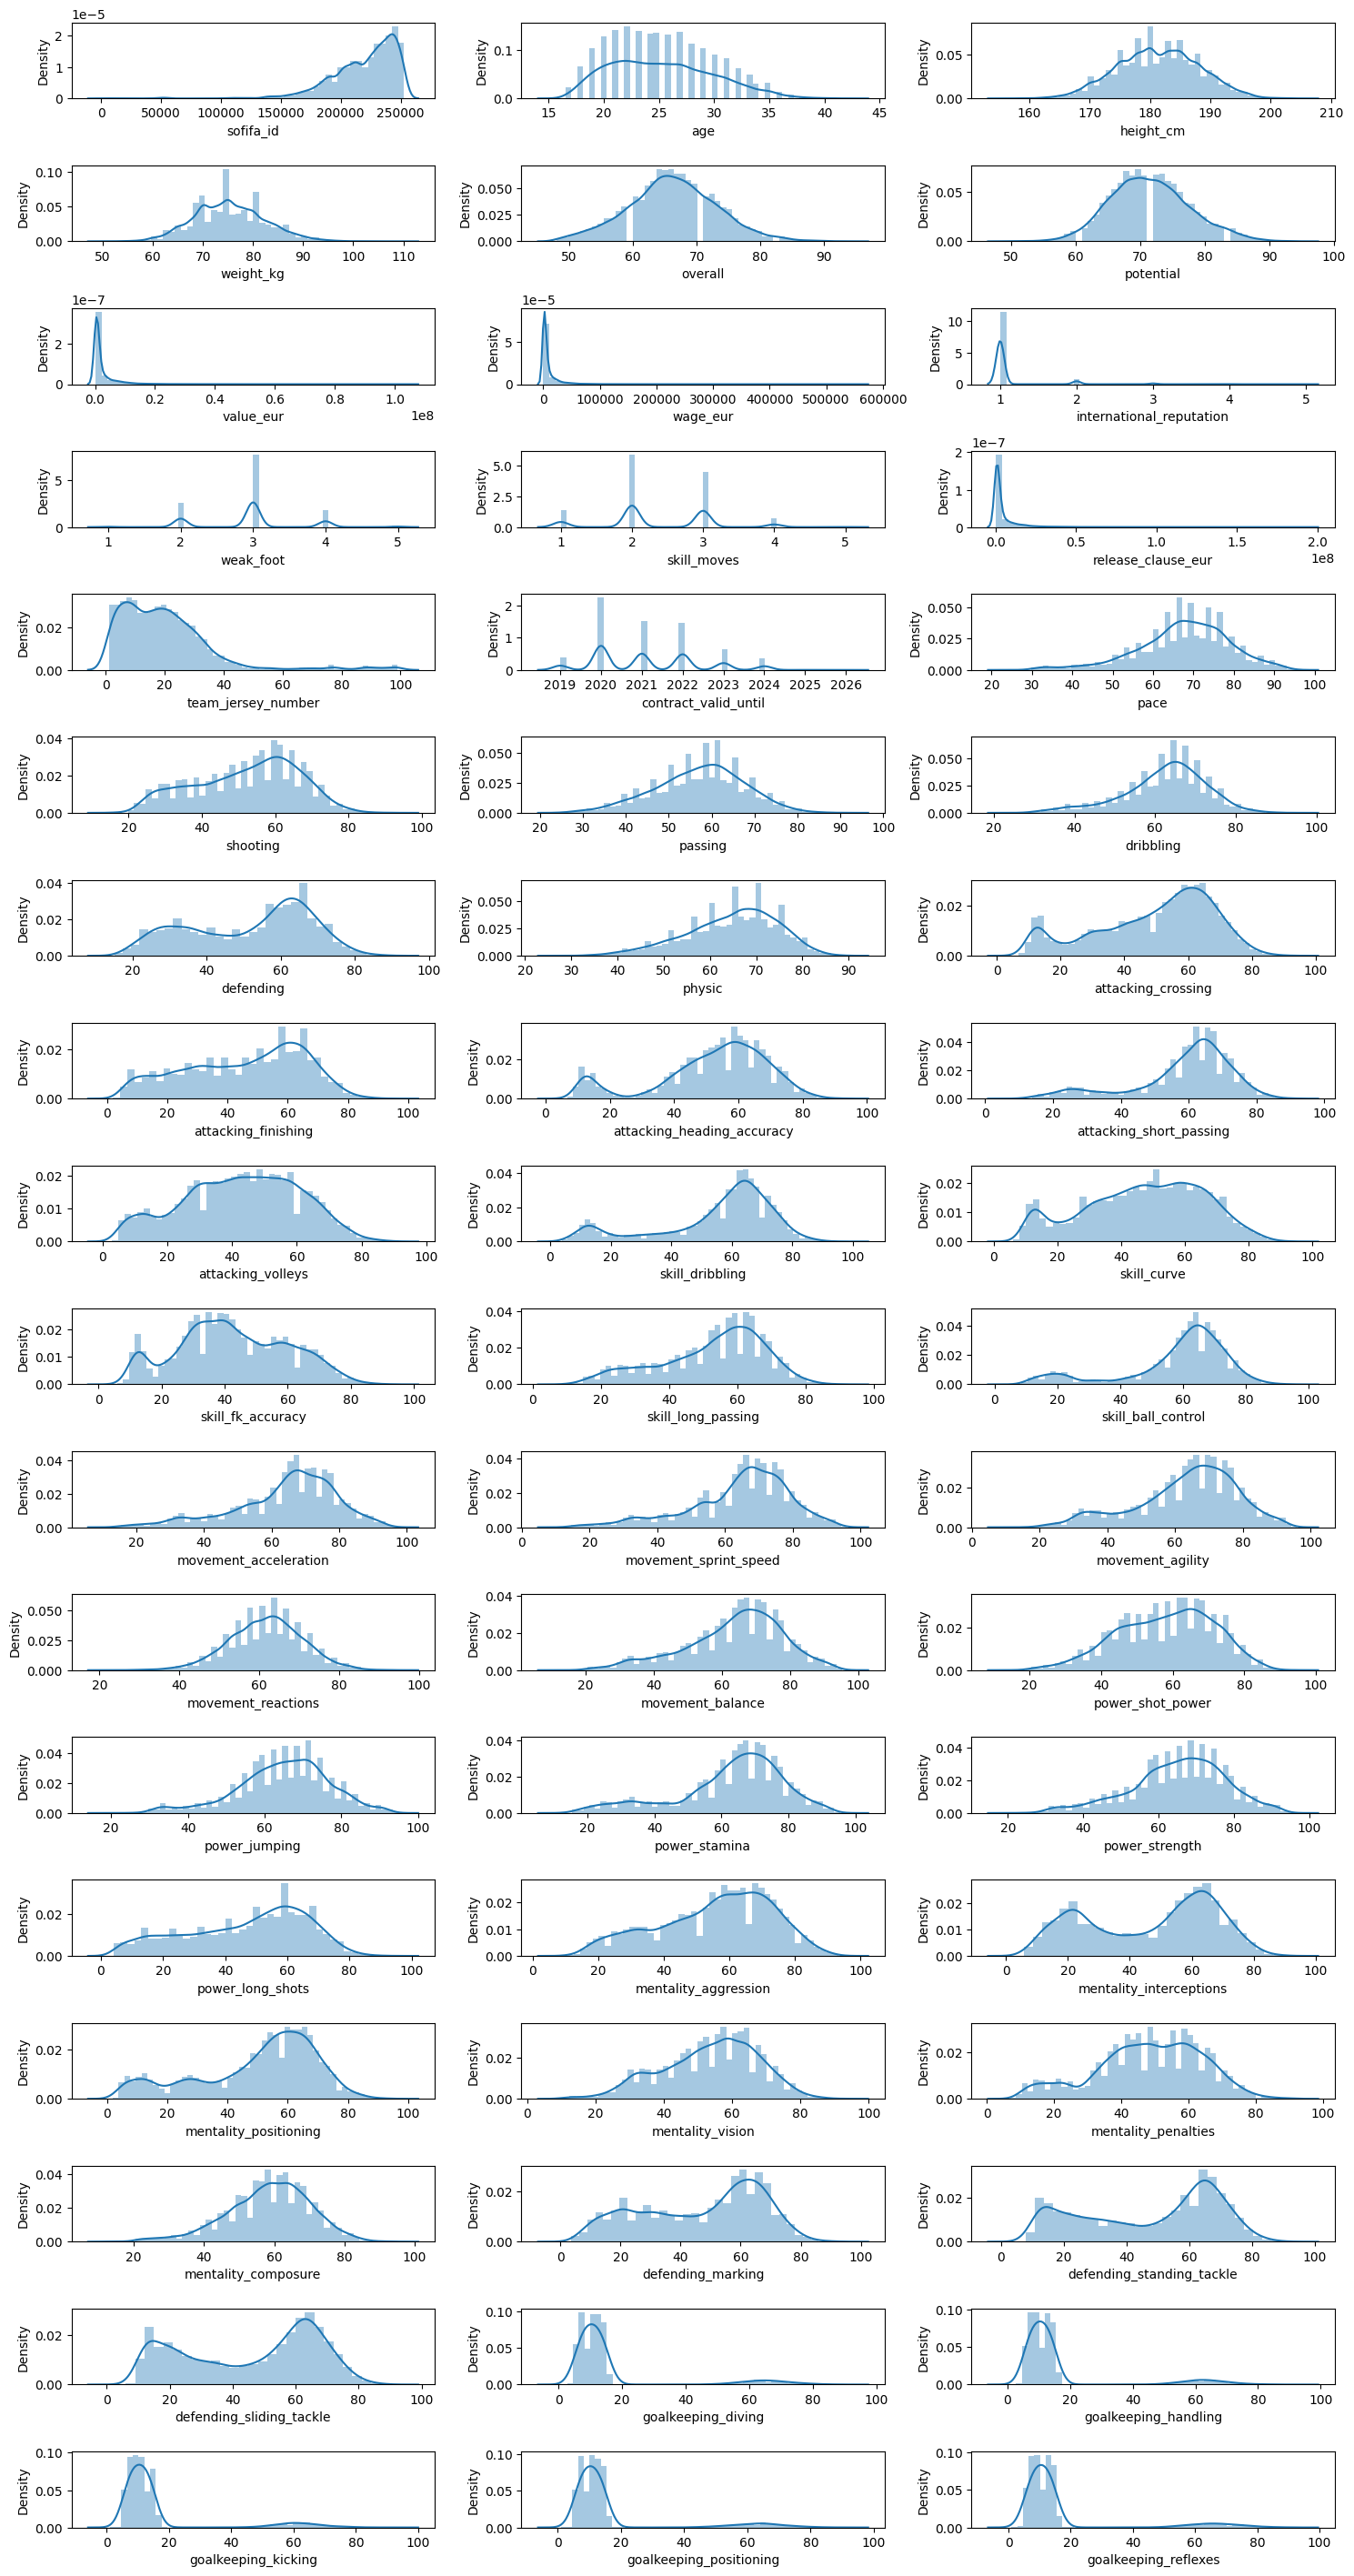

In [17]:

num_cols=new_data.select_dtypes(include=["float64","int64"])
plt.figure(figsize=(15,50))
num=1
for i in num_cols:
    if num<=94:
        plt.subplot(32,3,num)
        sns.distplot(x=new_data[i])
        plt.xlabel(i)
    num+=1
plt.tight_layout()

### Insights
* **Age**: Age of players lies between 15 to 40
* **Height**:Most of player's height lies between 170 cm to 200 cm
* **Weight**:Most of player's weight ranges from 60kg to 90kg
* **Overall**:Overall performance ratings for each player ranges from 50 to 90
* **Value_EUR**:Maximum value of player is 105.5 million. 95% of players has value 10.5 million
* **Wage_EUR:** Maximum wage of player is 526k.95% of players has wage 38k.
* **International Reputation:** less than 1% of players has 5 rating. 92% players has 1 rating
* **release clause EUR:** The maximum release clause of player is 195.8 million The Average release clause of player is 4.7 million
* **Pace:** The most of the pace of player between 60 to 80.
* **passing:** The range of passing score of the player is 24 to 92 with the average 57.2.
* **dribbling:** The most no of dribbling score between 50 to 80.
* **defending:** The Most no of defending score between 50 to 70.
* **physic:** The most no of physcore between 60 to 80
* **Attacking crossing:** The most observation of attacking passing between 50 to 70
* **Attacking Finishing:** Most of the attacking finishing is 60,Maximum 95 and minimum 2 attacking finishing.
* **Attacking heading accuracy:** Most observation of attacking heading accuracy between 50 to 60
* **Attacking Shot passing:** Most observation of attacking short passing between 60 to 70
* **Attacking Volleys:** Most observation of attacking volleys between 30 to 70.
* **Skill Dribbling:** most observation of skill dribbling is 65. The range of skill dribbling between 4 to 97
* **Skill Accuracy:** The most observation of skill curve between 40 to 70, maximum score is 94 and minimum score is 6
* **Skill FK Accuracy:** The maximum accuracy is 94 and minimum accuracy is 4 with the average of 42.7
* **Skill long passing:** The most observation of skill long passing between 50 to 60, maximum score is 92 and minimum score is 8
* **skill ball control:** The maximum skill ball control is 96 and minimum skill ball control is 5 with the average of 58.5
* **Movement acceleration:** The most observation of movement acceleration between 60 to 80, maximum score is 97 and minimum score is 12
* **Movement sprint speed:** Maximum sprint speed is 96 and minimum sprint speed is 11 with the average of 64.4
* **Movement Agility:** Maximum movement agility is 96 and minimum movement agility is 11 with the average of 63.5
* **Movement Reaction:** Maximum movement reaction is 96 and minimum movement reaction is 21 with the average of 61.8
* **Movement Balance:** The range of movement balance is 12 to 97 with 64.9 average.
* **Power shot power:** Maximum shot power is 95 and minimum shot power is 14 with the average of 58.2
* **Power jumping:** Maximum power jumping is 95 and minimum power jumping is 19 with the average of 64.9
* **Power Stamina:** Maximum power stamina is 97 and minimum shot stamina is 12 with the average of 62.9
* **Power strength:** Maximum power strength is 97 and minimum power strength is 20 with the average of 65.2
* **Power long shot:** Maximum power long shot is 94 and minimum power long shot is 4 with the average of 46.8
* **Mentality aggression:** Maximum mentality aggression is 95 and minimum mentality aggression is 9 with the average of 55.7
* **Mentality interception:** Maximum mentality interception is 93 and minimum mentality interception is 3 with the average of 46.3
* **Metality Positioning:** Maximum mentality positioning is 95 and minimum mentality positioning is 2 with the average of 50.1
* **Mentality Vision:** Maximum mentality vision is 94 and minimum mentality vision is 9 with the average of 53.6
* **Mentality Penalities:** Maximum mentality penalties is 92 and minimum mentality penalties is 7 with the average of 48.7
* **Mentality Composer:** Maximum mentality composure is 96 and minimum mentality composure is 12 with the average of 58.5
* **Defending Marking:** Maximum defending marking is 94 and minimum defending marking is 1 with the average of 46.8
* **Defending standing tackle:** Maximum defending standing tackle is 92 and minimum defending standing tackle is 5 with the average of 47.6
* **Defending sliding tackle:** Maximum defending sliding tackle is 90 and minimum defending sliding tackle is 3 with the average of 45.6
* **Goalkeeping diving:** Maximum goalkeeping diving is 90 and minimum goalkeeping diving is 1 with the average of 16.6
* **Goalkeeping Handling:** Maximum goalkeeping handling is 92 and minimum goalkeeping diving is 1 with the average of 16.4
* **Goalkeeping kicking :** Maximum goalkeeping kicking is 91 and minimum goalkeeping diving is 1 with the average of 16.4
* **Goalkeeping Reflex:** Maximum goalkeeping Reflex is 92 and minimum goalkeeping diving is 1 with the average of 16.7



In [18]:
#Checking whether the data is normally distributed or not

In [19]:
# check distribution continous data
# checking normality of columns
from scipy import stats

for i in num_cols:
    stat, p = stats.normaltest(data[i])
    print("\n**********************************************\n")
    if p > 0.05:
        print(f"{i} column appears to be normally distributed")
    else:
        print(f"{i} column does not appear to be normally distributed")



**********************************************

sofifa_id column does not appear to be normally distributed

**********************************************

age column does not appear to be normally distributed

**********************************************

height_cm column does not appear to be normally distributed

**********************************************

weight_kg column does not appear to be normally distributed

**********************************************

overall column does not appear to be normally distributed

**********************************************

potential column does not appear to be normally distributed

**********************************************

value_eur column does not appear to be normally distributed

**********************************************

wage_eur column does not appear to be normally distributed

**********************************************

international_reputation column does not appear to be normally distributed

************

#### Almost all features are not normally distributed 

#### Bivariate Analysis

#### Age Vs Other Features

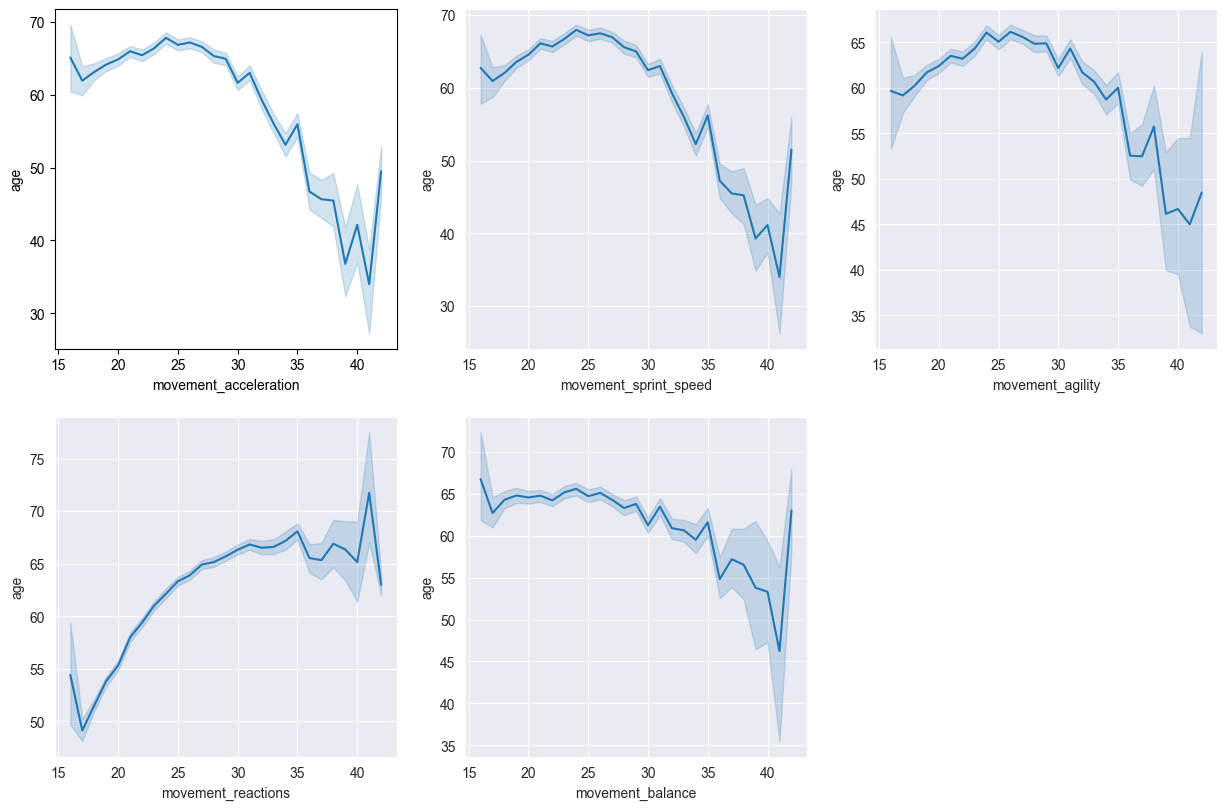

In [20]:
# How Age affects on Movements of players 
#Movement acceleration, Movement sprint speed, Movement Agility, Movement Reaction,Movement Balance:
plt.figure(figsize=(15,15))
list=['movement_acceleration','movement_sprint_speed','movement_agility','movement_reactions','movement_balance']
num=1
for col in list:
    if num<=6:
        plt.subplot(3,3,num)
        sns.set_style('darkgrid')
        sns.lineplot(x=new_data['age'],y=new_data[col])
        plt.xlabel(col)
        plt.ylabel('age')
    num+=1

### Insights
* After age 30 movement_accelartion,movement_sprint_speed,movement_agility,movement_balance drops.
* But as age increases the movement_reactions are also increases, with the less age between 15 to 20 Movement reactions are very less  

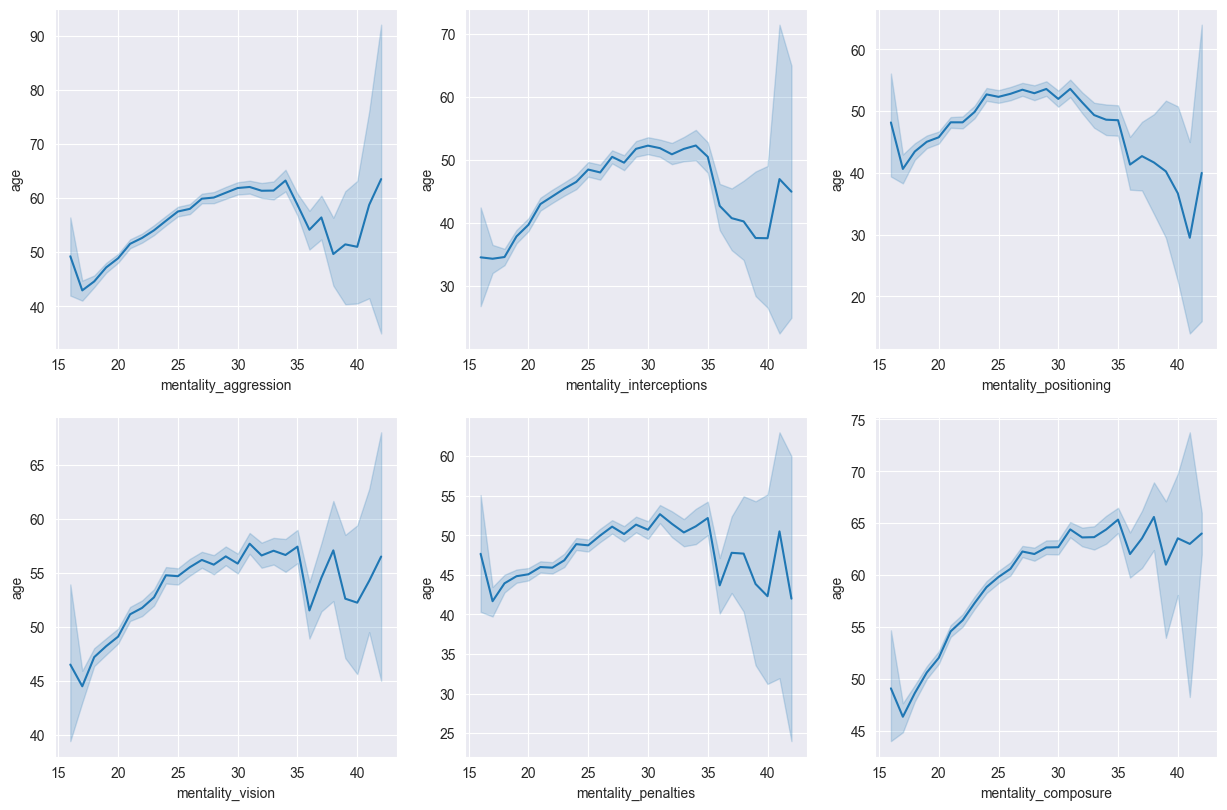

In [21]:
# How Age affects on different mentality aspects of players 
plt.figure(figsize=(15,15))
list=['mentality_aggression', 'mentality_interceptions', 'mentality_positioning', 
      'mentality_vision', 'mentality_penalties', 'mentality_composure']
num=1
for col in list:
    if num<=6:
        plt.subplot(3,3,num)
        sns.set_style('darkgrid')
        sns.lineplot(x=new_data['age'],y=new_data[col])
        plt.xlabel(col)
        plt.ylabel('age')
    num+=1

* aggression and interceptions is high when age of player is between 20 to 35
* positioning and penalties are constant for all age players but it slightly drops with high age
* vision and composure of player increases as age increases

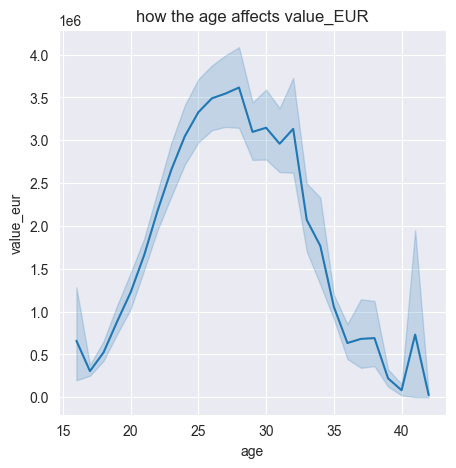

In [22]:
# how the age affects value_EUR
plt.figure(figsize=(5,5))
sns.set_style('darkgrid')
sns.lineplot(x='age',y='value_eur',data=new_data)
plt.title('how the age affects value_EUR')
plt.show()

* Value of player is high when age is between 20 to 35

#### Height Vs Other Features

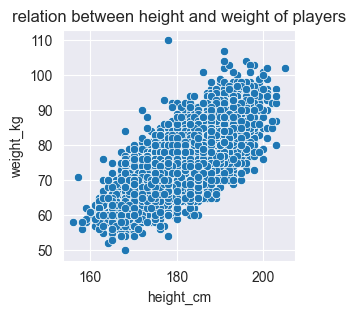

In [23]:
# relation between height and weight of players
plt.figure(figsize=(3,3))
sns.set_style('darkgrid')
sns.scatterplot(x='height_cm',y='weight_kg',data=new_data)
plt.title('relation between height and weight of players')
plt.show()

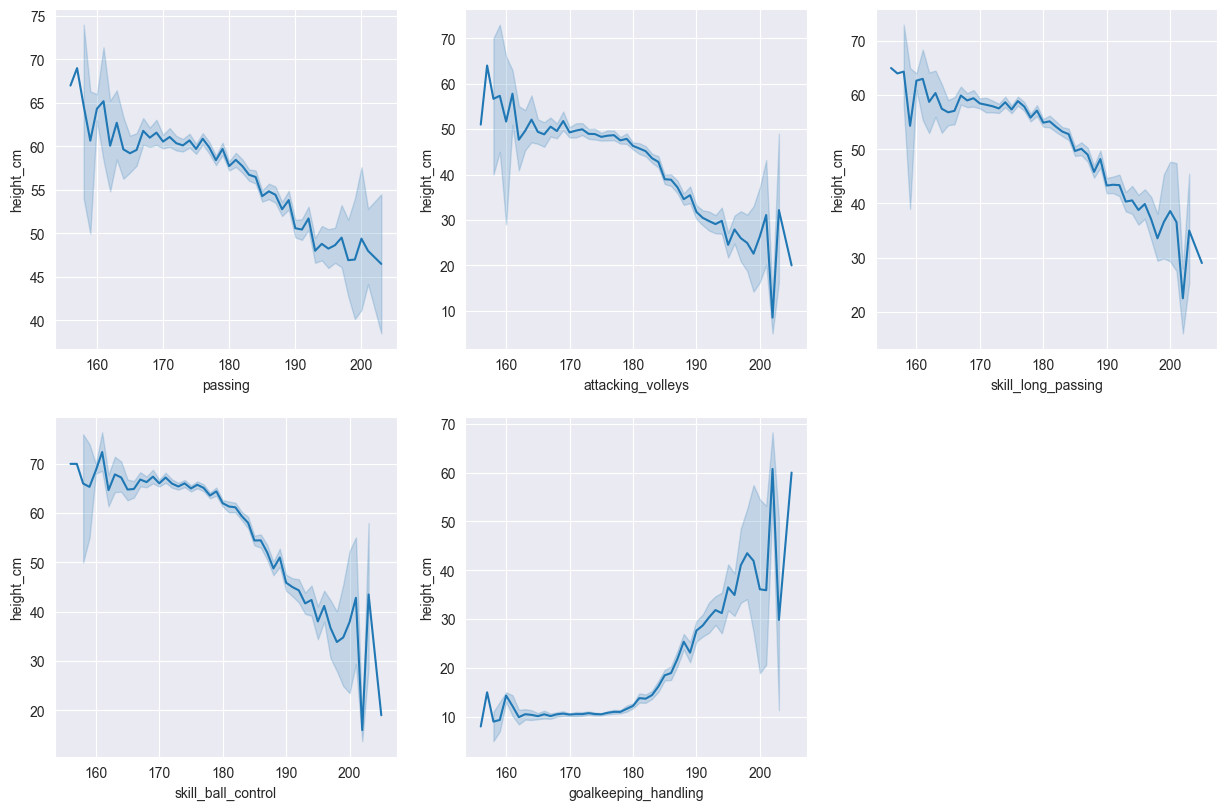

In [24]:
# Height of player affects different skills
plt.figure(figsize=(15,15))
skills=['passing','attacking_volleys','skill_long_passing', 'skill_ball_control','goalkeeping_handling']
num=1
for col in skills:
    if num<=6:
        plt.subplot(3,3,num)
        sns.set_style('darkgrid')
        sns.lineplot(x=new_data['height_cm'],y=new_data[col])
        plt.xlabel(col)
        plt.ylabel('height_cm')
    num+=1


#### Wage and Value of player Vs Other features

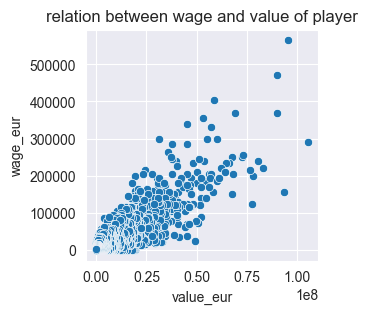

In [25]:
#relation between wage and value of player
plt.figure(figsize=(3,3))
sns.set_style('darkgrid')
sns.scatterplot(x='value_eur',y='wage_eur',data=new_data)
plt.title('relation between wage and value of player')
plt.show()

* If player value is less then the wage of player also less.
* If the value of player is more the wage is silghtly more.

In [26]:
# Impact of international reputation on wage of player

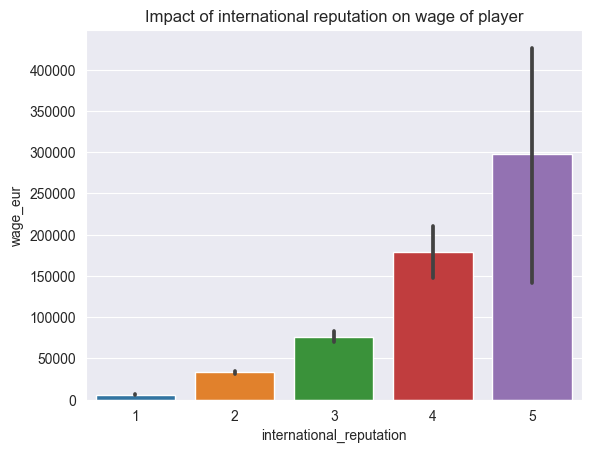

In [27]:
sns.set_style('darkgrid')
sns.barplot(x='international_reputation',y='wage_eur',data=new_data)
plt.title('Impact of international reputation on wage of player')
plt.show()

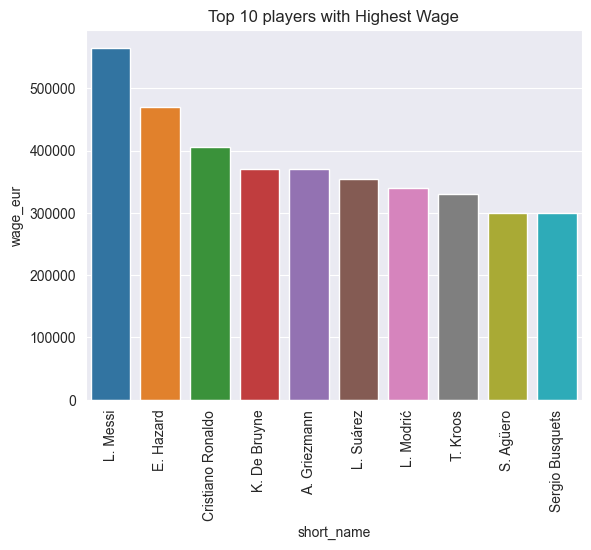

In [28]:
# Top 10 Players with highest wage
wage=new_data.sort_values('wage_eur',ascending=False).head(10)
sns.set_style('darkgrid')
sns.barplot(x=wage['short_name'],y=wage['wage_eur'])
plt.title('Top 10 players with Highest Wage')
plt.xticks(rotation=90)
plt.show()

* L. Messi, E. Hazard, Cristiano Ronaldo are top 3 players who has highest wage

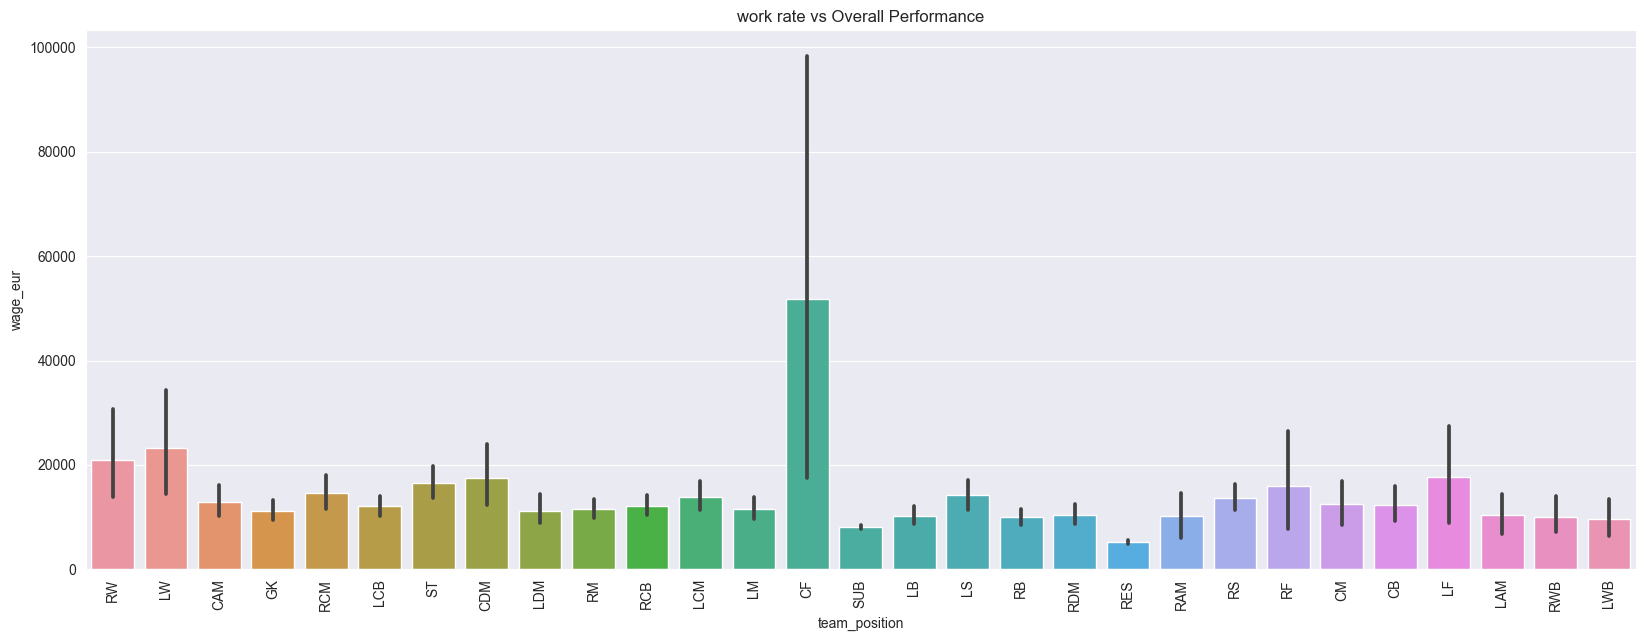

In [29]:
# team position affect on overall performance
sns.set_style('darkgrid')
plt.figure(figsize=(20,7))
sns.barplot(x=new_data['team_position'],y=new_data['wage_eur'])
plt.title('work rate vs Overall Performance')
plt.xticks(rotation=90)
plt.show()

* players at position CF earns more than the player on any other position
* Next to players at position CF ,RW and LW position player earns much better
* players at RES position Earns less than players on anyother position 

#### Overall VS other Features

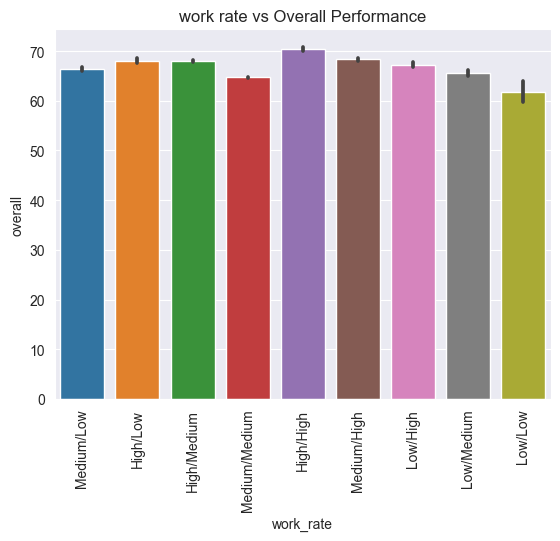

In [30]:
# work rate vs Overall
sns.set_style('darkgrid')
sns.barplot(x=new_data['work_rate'],y=new_data['overall'])
plt.title('work rate vs Overall Performance')
plt.xticks(rotation=90)
plt.show()

* If Work rate is high overall performance is high
* If Work rate is low overall performance is low

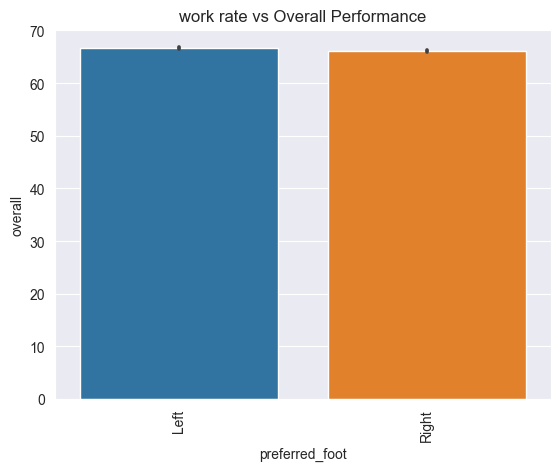

In [31]:
# preferred foot affect on overall performance
sns.set_style('darkgrid')
sns.barplot(x=new_data['preferred_foot'],y=new_data['overall'])
plt.title('work rate vs Overall Performance')
plt.xticks(rotation=90)
plt.show()

* Preferred foot doesn't have any affect on overall performance

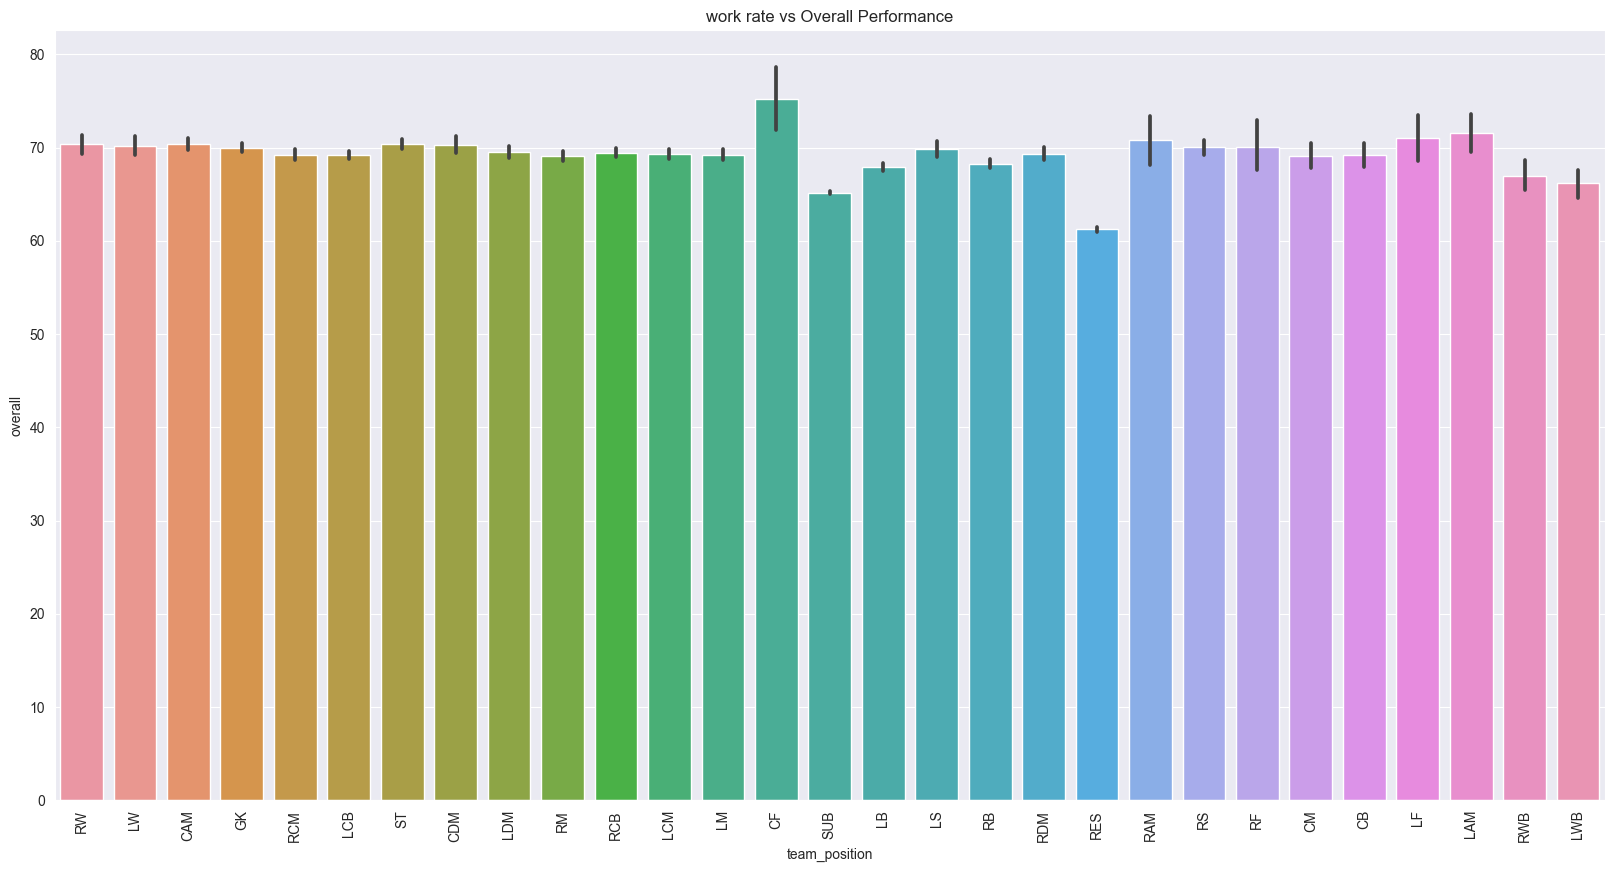

In [32]:
# team position affect on overall performance
sns.set_style('darkgrid')
plt.figure(figsize=(20,10))
sns.barplot(x=new_data['team_position'],y=new_data['overall'])
plt.title('work rate vs Overall Performance')
plt.xticks(rotation=90)
plt.show()

* players at CF Position has high overall performance
* players at RES Position has less overall performance than anyother position
* players on other position works equally

### Task 3.1. Prepare a rank ordered list of top 10 countries with most players. Which countries are producing the most footballers that play at this level?

In [33]:
value_count = new_data['nationality'].value_counts()
rank_con=pd.DataFrame(value_count)
rank_con['Rank']=rank_con['nationality'].rank(ascending=False)
rank_con.reset_index(inplace=True)
countries=rank_con.head(10)
countries

index  nationality  Rank
0      England         1667   1.0
1      Germany         1216   2.0
2        Spain         1035   3.0
3       France          984   4.0
4    Argentina          886   5.0
5       Brazil          824   6.0
6        Italy          732   7.0
7     Colombia          591   8.0
8        Japan          453   9.0
9  Netherlands          416  10.0

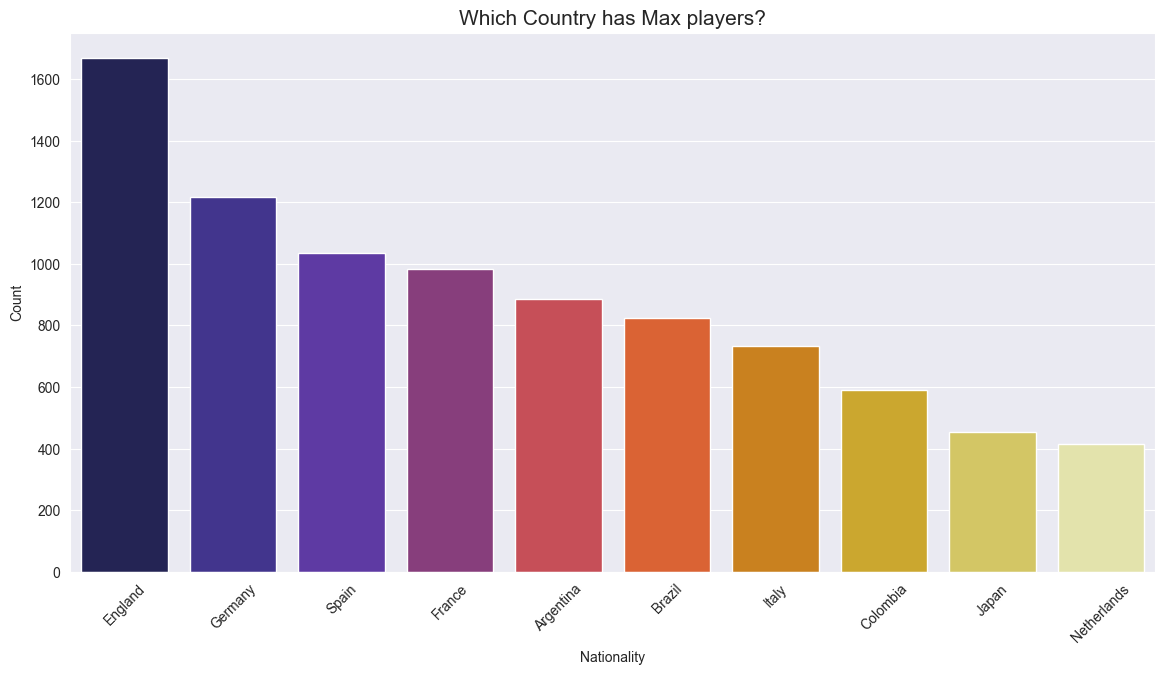

In [34]:
plt.figure(figsize=(14,7))
sns.barplot(x=countries['index'],y=countries['nationality'],palette='CMRmap')
plt.xlabel('Nationality')
plt.ylabel('Count')
plt.xticks(rotation=45) # used to tild the name on x axis
plt.title('Which Country has Max players?',fontsize=15)
plt.show()

### Insights
1. England  2. Germany  3. Spain  4. France  5. Argentina  6.Brazil  7. Italy  8. Colombia  9. Japan 10. Netherlands
    
   are top 10 countries which has maximum players.

### Task 3.2 Plot the distribution of overall rating vs. age of players. Interpret what is the age after which a player stops improving?

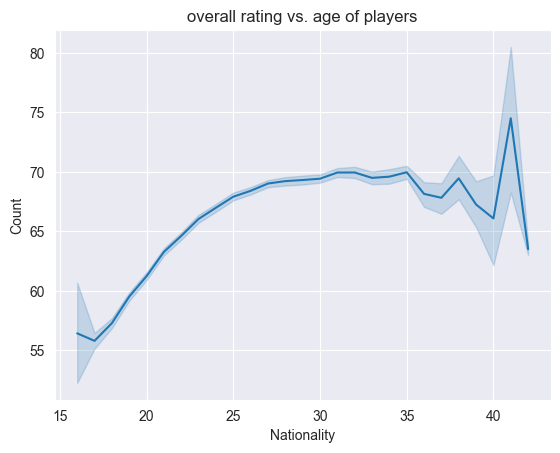

In [35]:
# How Age affects on overall performance of players
sns.set_style('darkgrid')
sns.lineplot(x='age',y='overall',data=new_data)
plt.xlabel('Nationality')
plt.ylabel('Count')
plt.title('overall rating vs. age of players')
plt.show()

### Insights
* with the increasing age overall performance of player is also increases
* after the age of 40 to 42 years player stops improving overall performance  

### Task 3.2 Which type of offensive players tends to get paid the most: the striker, the right-winger, or the left-winger?

In [36]:
position_data=new_data.loc[(new_data['player_positions']=='ST') | (new_data['player_positions']=='RW')| (new_data['player_positions']=='LW')]
position_data['player_positions'].unique()

array(['ST', 'LW', 'RW'], dtype=object)

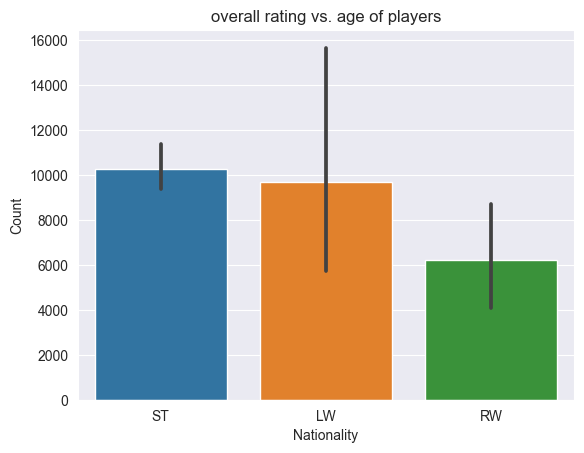

In [37]:
sns.set_style('darkgrid')
sns.barplot(x='player_positions',y='wage_eur',data=position_data)
plt.xlabel('Nationality')
plt.ylabel('Count')
plt.title('overall rating vs. age of players')
plt.show()

### Insights
Strikers get paid most than Left Winger and Right Winger 

### **Historical comparison between Messi and Ronaldo (what skill attributes changed the most during time - compared to real-life stats);**

In [38]:
skills=['shooting','passing','dribbling','defending','attacking_crossing','attacking_crossing',
    'attacking_finishing','attacking_heading_accuracy','attacking_short_passing','attacking_volleys',
    'skill_dribbling','skill_curve','skill_fk_accuracy','skill_long_passing',
    'skill_ball_control','skill_ball_control','movement_acceleration','movement_sprint_speed',
    'movement_agility','movement_reactions','movement_balance','defending_marking',
    'defending_standing_tackle','defending_sliding_tackle','goalkeeping_diving','goalkeeping_handling',
    'goalkeeping_kicking','goalkeeping_positioning','goalkeeping_reflexes']

In [39]:
players=data[skills]
players=players.head(2)
comparison_df = players.transpose()
comparison_df.rename(columns={0:'Messi',1:'Ronaldo'},inplace=True)
comparison_df

Messi  Ronaldo
shooting                     92.0     93.0
passing                      92.0     82.0
dribbling                    96.0     89.0
defending                    39.0     35.0
attacking_crossing           88.0     84.0
attacking_crossing           88.0     84.0
attacking_finishing          95.0     94.0
attacking_heading_accuracy   70.0     89.0
attacking_short_passing      92.0     83.0
attacking_volleys            88.0     87.0
skill_dribbling              97.0     89.0
skill_curve                  93.0     81.0
skill_fk_accuracy            94.0     76.0
skill_long_passing           92.0     77.0
skill_ball_control           96.0     92.0
skill_ball_control           96.0     92.0
movement_acceleration        91.0     89.0
movement_sprint_speed        84.0     91.0
movement_agility             93.0     87.0
movement_reactions           95.0     96.0
movement_balance             95.0     71.0
defending_marking            33.0     28.0
defending_standing_tackle    37.0     32.0
defending_sliding_tackle     26.0     24.0
goalkeeping_diving            6.0      7.0
goalkeeping_handling         11.0     11.0
goalkeeping_kicking          15.0     15.0
goalkeeping_positioning      14.0     14.0
goalkeeping_reflexes          8.0     11.0

<Figure size 1000x1000 with 0 Axes>

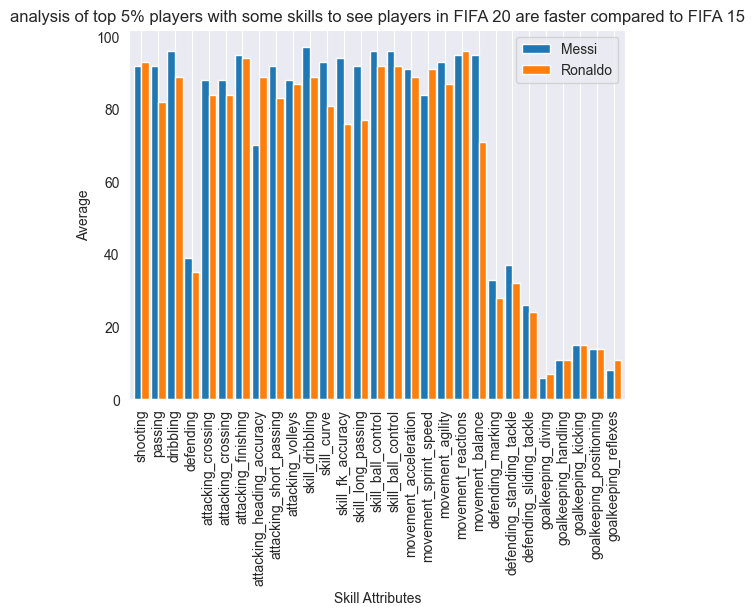

In [40]:
plt.figure(figsize=(10, 10))
comparison_df.plot(kind='bar',width=0.9)
plt.xlabel('Skill Attributes')
plt.ylabel('Average')
plt.title('analysis of top 5% players with some skills to see players in FIFA 20 are faster compared to FIFA 15')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.show()

* Messi's dribbling and passing skills are superior. 
* Ronaldo is a faster player, with a pace. 
* However, Ronaldo has a higher shooting score than Messi. 
* Messi also has better movement reactions and balance than Ronaldo, making him a more agile and well-rounded player.

### **Ideal budget to create a competitive team (at the level of top n teams in Europe) and at which point the budget does not allow to buy significantly better players for the 11-men lineup. An extra is the same comparison with the Potential attribute for the lineup instead of the Overall attribute.**

In [41]:
data['team_position'].unique()

array(['RW', 'LW', 'CAM', 'GK', 'RCM', 'LCB', 'ST', 'CDM', 'LDM', 'RM',
       'RCB', 'LCM', 'LM', 'CF', 'SUB', 'LB', 'LS', 'RB', 'RDM', 'RES',
       'RAM', 'RS', 'RF', 'CM', 'CB', 'LF', 'LAM', nan, 'RWB', 'LWB'],
      dtype=object)

   team_position  wage_eur  potential
2             CF    4000.0       69.3
1            CDM    1000.0       66.0
6            LDM    1000.0       66.0
9            RDM    1000.0       66.0
10            RW    1000.0       66.0
4             GK    1000.0       65.0
5             LB    1000.0       65.0
7             LW    1000.0       65.0
8             RB    1000.0       65.0
11            ST    1000.0       65.0
0             CB    1000.0       64.0
3             CM    1000.0       64.0


<AxesSubplot: xlabel='wage_eur', ylabel='potential'>

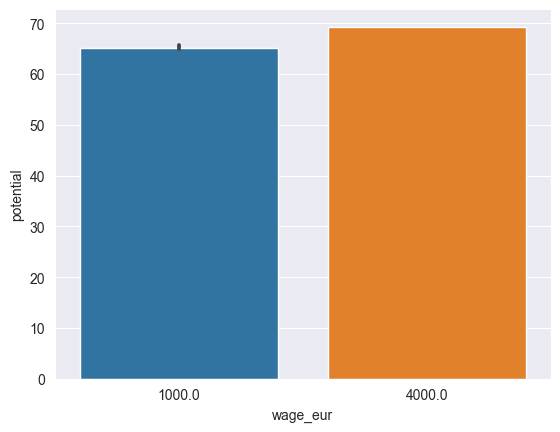

In [42]:
players=data[['team_position','potential','wage_eur']]
team_positions = ['GK', 'RB', 'CB', 'LB', 'CDM', 'RDM', 'LDM', 'RW', 'CF', 'LW','ST','CM']
team_players = players[players['team_position'].isin(team_positions)]

#finding low, medium, high wage players
low_wage=team_players.groupby('team_position')[['wage_eur','potential']].quantile(0.10).reset_index()
low_wage=low_wage.sort_values(by=['potential'],ascending=False)
print(low_wage)
#plot graph 
sns.barplot(x=low_wage['wage_eur'],y=low_wage['potential'])

   team_position  wage_eur  potential
2             CF   21000.0       77.5
10            RW    5000.0       74.0
7             LW    6000.0       73.5
1            CDM    6000.0       73.0
11            ST    6000.0       73.0
4             GK    4000.0       72.0
6            LDM    5000.0       72.0
9            RDM    5000.0       72.0
3             CM    4000.0       71.5
5             LB    4000.0       71.0
8             RB    4000.0       71.0
0             CB    4000.0       70.5


<AxesSubplot: xlabel='wage_eur', ylabel='potential'>

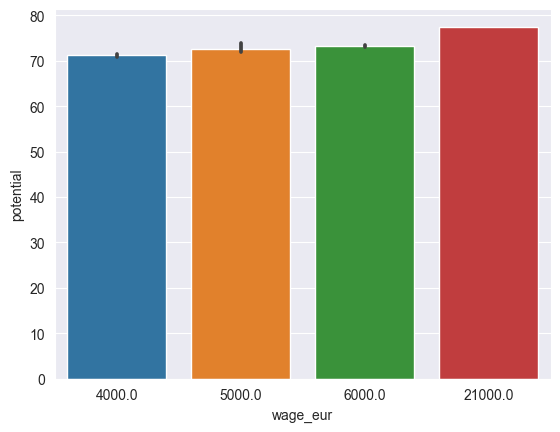

In [43]:
#finding low, medium, high wage players
medium_wage=team_players.groupby('team_position')[['wage_eur','potential']].quantile(0.50).reset_index()
medium_wage=medium_wage.sort_values(by=['potential'],ascending=False)
print(medium_wage)
#plot graph 
sns.barplot(x=medium_wage['wage_eur'],y=medium_wage['potential'])

   team_position  wage_eur  potential
10            RW  565000.0       95.0
4             GK  250000.0       93.0
7             LW  470000.0       93.0
6            LDM  250000.0       91.0
11            ST  355000.0       91.0
9            RDM   82000.0       90.0
1            CDM  300000.0       89.0
5             LB  240000.0       89.0
8             RB  205000.0       89.0
0             CB   88000.0       88.0
2             CF  285000.0       87.0
3             CM   89000.0       87.0


<AxesSubplot: xlabel='wage_eur', ylabel='potential'>

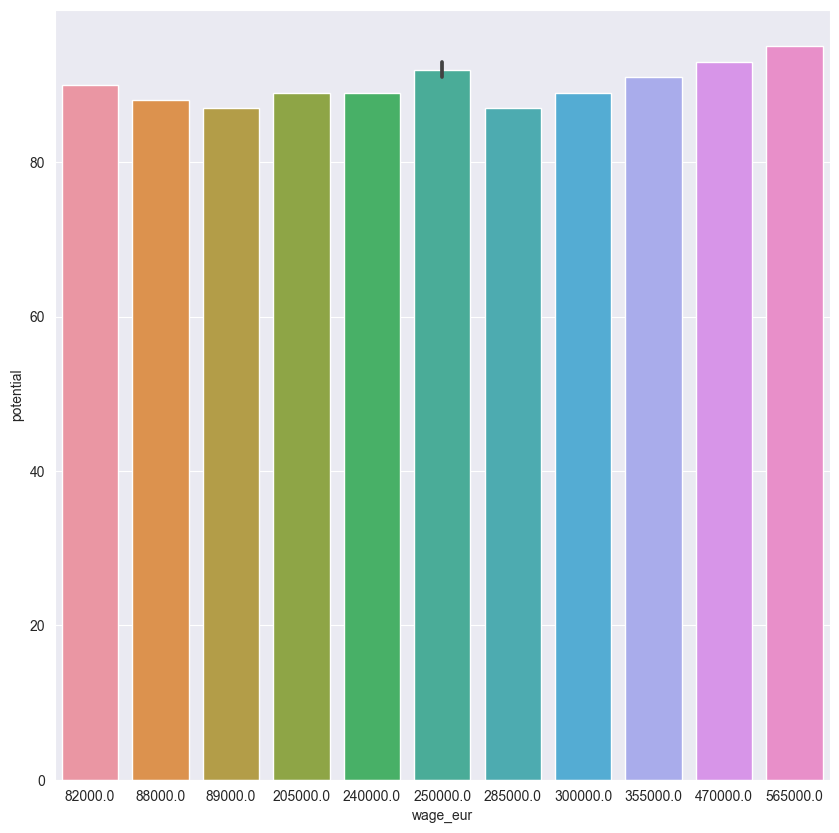

In [44]:
#finding low, medium, high wage players
high_wage=team_players.groupby('team_position')[['wage_eur','potential']].quantile(1).reset_index()
high_wage=high_wage.sort_values(by=['potential'],ascending=False)
print(high_wage)
plt.figure(figsize=(10,10))
sns.barplot(x=high_wage['wage_eur'],y=high_wage['potential'])


In [45]:
# selecting 3 players of low_wage for position CF,CDM,LDM
# 5 players of medium wage for position RW,LW,CB,LB,RB , 
# 3 players of high wage for remaining positions GK,ST,RDM 
l=['CF','CDM','LDM']
m=['RW','LW','CB','LB','RB']
h=['GK','ST','RDM']
low=low_wage.loc[low_wage['team_position'].isin(l)]
medium=medium_wage.loc[low_wage['team_position'].isin(m)]
high=high_wage.loc[low_wage['team_position'].isin(h)]

ideal_team=pd.concat([low,medium,high],axis=0)

ideal_team


team_position  wage_eur  potential
2             CF    4000.0       69.3
1            CDM    1000.0       66.0
6            LDM    1000.0       66.0
10            RW    5000.0       74.0
7             LW    6000.0       73.5
5             LB    4000.0       71.0
8             RB    4000.0       71.0
0             CB    4000.0       70.5
4             GK  250000.0       93.0
11            ST  355000.0       91.0
9            RDM   82000.0       90.0

In [46]:
#Approximate ideal budget will be
ideal_budget=ideal_team['wage_eur'].sum()
print("Ideal Budget for 11 players team",ideal_budget)

Ideal Budget for 11 players team 716000.0


## Data Preprocessing

### duplicates

In [47]:
new_data.duplicated().sum()

0

### Null Values


In [48]:
null_val=[]
for col in new_data:
    per_null=len(new_data.loc[new_data[col].isnull()==True])/len(new_data)*100
    
    if per_null>0:
        null_val.append(col)
        print("---------------------------")
        print("Column: ",col)
        print("Null Value Percentage",per_null)

---------------------------
Column:  release_clause_eur
Null Value Percentage 7.101433417222891
---------------------------
Column:  team_position
Null Value Percentage 1.313053944632892
---------------------------
Column:  team_jersey_number
Null Value Percentage 1.313053944632892
---------------------------
Column:  joined
Null Value Percentage 7.04672283619652
---------------------------
Column:  contract_valid_until
Null Value Percentage 1.313053944632892
---------------------------
Column:  pace
Null Value Percentage 11.139074296969035
---------------------------
Column:  shooting
Null Value Percentage 11.139074296969035
---------------------------
Column:  passing
Null Value Percentage 11.139074296969035
---------------------------
Column:  dribbling
Null Value Percentage 11.139074296969035
---------------------------
Column:  defending
Null Value Percentage 11.139074296969035
---------------------------
Column:  physic
Null Value Percentage 11.139074296969035
-------------------

In [49]:
print(null_val)

['release_clause_eur', 'team_position', 'team_jersey_number', 'joined', 'contract_valid_until', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic', 'ls', 'st', 'rs', 'lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam', 'ram', 'lm', 'lcm', 'cm', 'rcm', 'rm', 'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb']


#### Numerical columns which has null values

In [50]:
num_null=['release_clause_eur','pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic']


#### Handling Numerical null values 

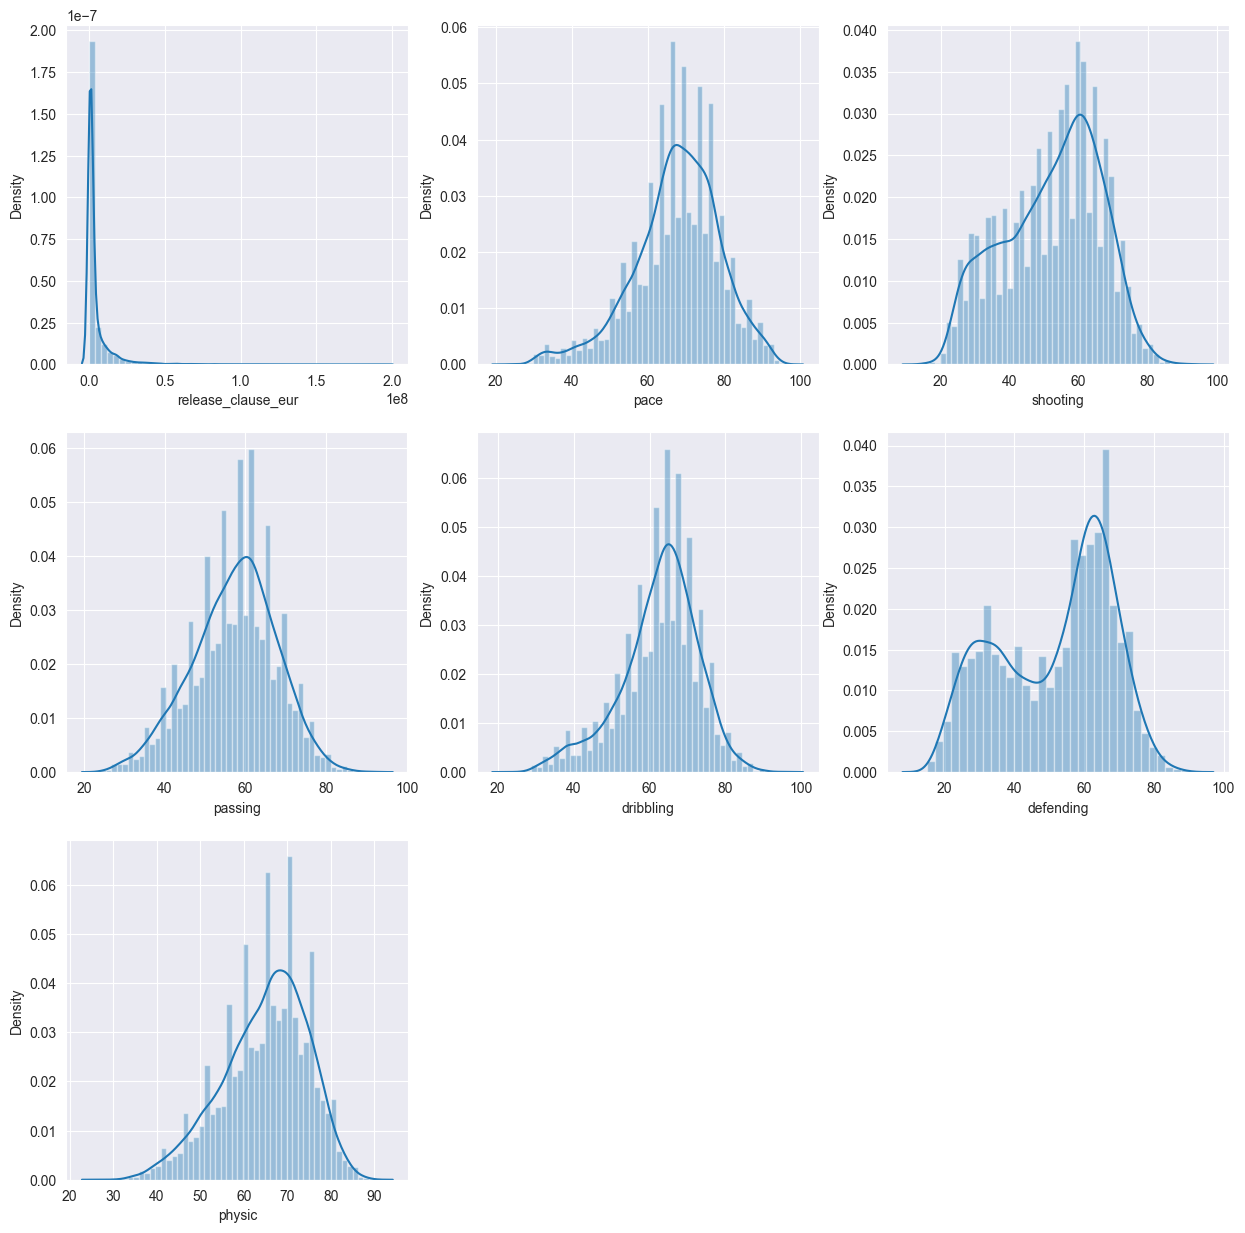

In [51]:
plt.figure(figsize=(15,15))
num=1
for i in num_null:
    if num<=9:
        plt.subplot(3,3,num)
        sns.distplot(x=new_data[i])
        plt.xlabel(i)
    num+=1


**Replacing all values with median**

In [52]:
for col in num_null:
    new_data.loc[new_data[col].isnull()==True, col]=data[col].median()
    per=len(new_data.loc[new_data[col].isnull()==True])/len(new_data)*100
    print("---------------------------")
    print("Column: ",col)
    #checking null values are imputed or not
    print("Null Value Percentage",per)

---------------------------
Column:  release_clause_eur
Null Value Percentage 0.0
---------------------------
Column:  pace
Null Value Percentage 0.0
---------------------------
Column:  shooting
Null Value Percentage 0.0
---------------------------
Column:  passing
Null Value Percentage 0.0
---------------------------
Column:  dribbling
Null Value Percentage 0.0
---------------------------
Column:  defending
Null Value Percentage 0.0
---------------------------
Column:  physic
Null Value Percentage 0.0


#### Categorical column that has null values

In [53]:
new_data['team_position'].mode()

0    SUB
Name: team_position, dtype: object

In [54]:
new_data.loc[new_data['team_position'].isnull()==True,'team_position']='SUB'

In [55]:
len(new_data.loc[new_data[col].isnull()==True])/len(new_data)*100


0.0

#### All null values are imputed 

### Checking Outliers

In [56]:
num_cols=data.select_dtypes(include=['int64','float64'])
print(num_cols.columns)

Index(['sofifa_id', 'age', 'height_cm', 'weight_kg', 'overall', 'potential',
       'value_eur', 'wage_eur', 'international_reputation', 'weak_foot',
       'skill_moves', 'release_clause_eur', 'team_jersey_number',
       'contract_valid_until', 'nation_jersey_number', 'pace', 'shooting',
       'passing', 'dribbling', 'defending', 'physic', 'gk_diving',
       'gk_handling', 'gk_kicking', 'gk_reflexes', 'gk_speed',
       'gk_positioning', 'attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
       'movement_reactions', 'movement_balance', 'power_shot_power',
       'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
       'mentality_aggression', 'mentality_interceptions',
       'mentality_positionin

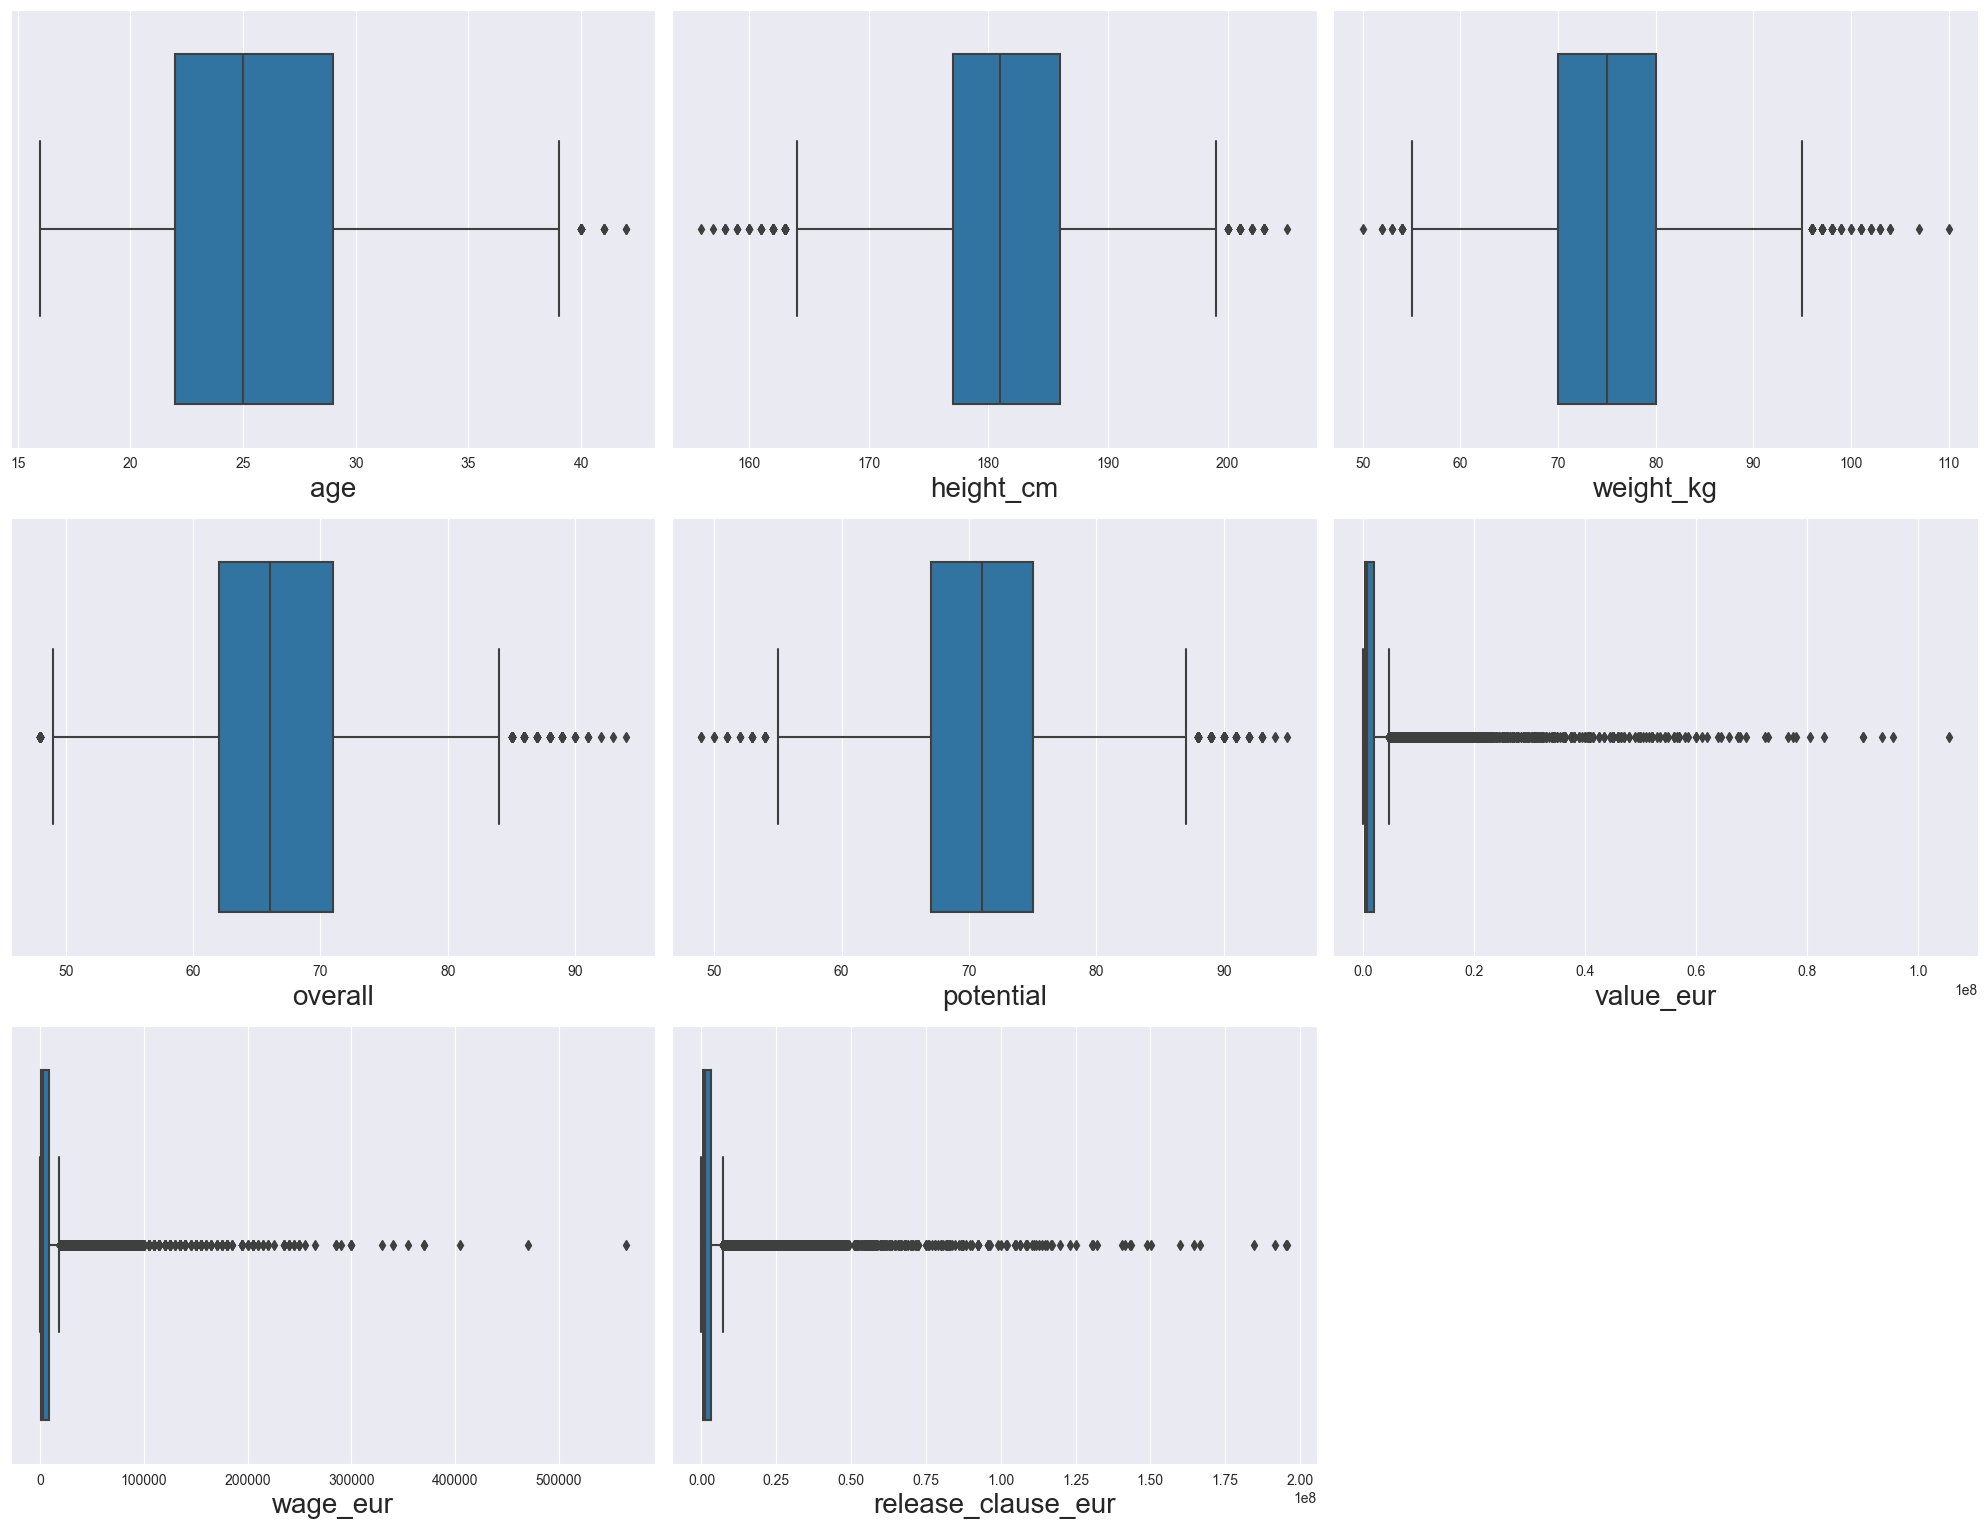

In [57]:
#In this data we are handle only important feature outlier, because the remaining feature is unique or 
# some feature is not reuired to handle outlier

out =new_data[['age','height_cm','weight_kg','overall','potential','value_eur','wage_eur',
               'release_clause_eur']]

plt.figure(figsize=(20,25)) 
plotno = 1 

for column in out: 
    if plotno<=16:    
        plt.subplot(5,3,plotno) 
        sns.boxplot(x=out[column]) 
        plt.xlabel(column,fontsize=20) 
    plotno+=1
plt.tight_layout()
plt.show()


In [58]:
#Checking Percentage of outliers
out =new_data[['age','height_cm','weight_kg','overall','potential','value_eur','wage_eur',
               'release_clause_eur','pace','shooting','dribbling','defending','physic']]

lower_lim_out={}
upper_lim_out={}

for column in out:
    Q1=new_data[column].quantile(0.25)
    Q3=new_data[column].quantile(0.75)
    IQR=Q3-Q1
    lower=Q1-1.5*IQR
    upper=Q1+1.5*IQR
    lower_lim_per=len(new_data.loc[(new_data[column]<lower)])/len(data)
    upper_lim_per=len(new_data.loc[(new_data[column]>upper)])/len(data)
    print("***********************")
    print("Column Name",column)
    print("percentage of outliers",lower_lim_per)
    lower_lim_out.update({column:lower_lim_per})
    print("percentage of outliers",upper_lim_per)
    upper_lim_out.update({column:upper_lim_per})


***********************
Column Name age
percentage of outliers 0.0
percentage of outliers 0.07544589123536492
***********************
Column Name height_cm
percentage of outliers 0.0031185031185031187
percentage of outliers 0.09027245869351133
***********************
Column Name weight_kg
percentage of outliers 0.0006018163912900755
percentage of outliers 0.0780719991246307
***********************
Column Name overall
percentage of outliers 0.0023525549841339317
percentage of outliers 0.08835758835758836
***********************
Column Name potential
percentage of outliers 0.001313053944632892
percentage of outliers 0.10553671079986869
***********************
Column Name value_eur
percentage of outliers 0.0
percentage of outliers 0.20188204398730714
***********************
Column Name wage_eur
percentage of outliers 0.0
percentage of outliers 0.19580916949338
***********************
Column Name release_clause_eur
percentage of outliers 0.0
percentage of outliers 0.20784549731918153
*****

* handling outliers from columns which has outliers less than 5%

In [59]:
lower_lim_out

{'age': 0.0,
 'height_cm': 0.0031185031185031187,
 'weight_kg': 0.0006018163912900755,
 'overall': 0.0023525549841339317,
 'potential': 0.001313053944632892,
 'value_eur': 0.0,
 'wage_eur': 0.0,
 'release_clause_eur': 0.0,
 'pace': 0.0419083050661998,
 'shooting': 0.0002735529051318525,
 'dribbling': 0.04048582995951417,
 'defending': 0.0,
 'physic': 0.02303315461210198}

In [60]:
upper_lim_out

{'age': 0.07544589123536492,
 'height_cm': 0.09027245869351133,
 'weight_kg': 0.0780719991246307,
 'overall': 0.08835758835758836,
 'potential': 0.10553671079986869,
 'value_eur': 0.20188204398730714,
 'wage_eur': 0.19580916949338,
 'release_clause_eur': 0.20784549731918153,
 'pace': 0.11593172119487909,
 'shooting': 0.057336688915636286,
 'dribbling': 0.08857643068169384,
 'defending': 0.02275960170697013,
 'physic': 0.0914213808950651}

In [61]:
for key,val in lower_lim_out.items():
    if val<=0.05 and val!=0.0:
        new_data.loc[new_data[key] < lower,key] = new_data[key].median()
        #checking outliers imputed or not
        lower_lim_per=len(new_data.loc[(new_data[key]<lower)])/len(data)
        print(key," ",lower_lim_per)

height_cm   0.0
weight_kg   0.0
overall   0.0
potential   0.0
pace   0.0
shooting   0.0
dribbling   0.0
physic   0.0


In [62]:
for key,val in upper_lim_out.items():
    if val<=0.05 and val!=0.0:
        new_data.loc[new_data[key] > upper,key] = new_data[key].median()
        #checking outliers imputed or not
        upper_lim_per=len(new_data.loc[(new_data[key]>upper)])/len(data)
        print(key," ",upper_lim_per)

defending   0.0


**Imputed all outliers successfully**

### Encoding

In [63]:
new_data.select_dtypes(include='O').columns

Index(['player_url', 'short_name', 'long_name', 'dob', 'nationality', 'club',
       'player_positions', 'preferred_foot', 'work_rate', 'body_type',
       'real_face', 'team_position', 'joined', 'ls', 'st', 'rs', 'lw', 'lf',
       'cf', 'rf', 'rw', 'lam', 'cam', 'ram', 'lm', 'lcm', 'cm', 'rcm', 'rm',
       'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb'],
      dtype='object')

**preferred_foot, work_rate,team_position are important categorical features are related to skills of players**


In [64]:
#preferred_foot
new_data['preferred_foot'].unique()

array(['Left', 'Right'], dtype=object)

In [65]:
new_data['preferred_foot']=new_data['preferred_foot'].map({'Left':0,'Right':1})

In [66]:
new_data['preferred_foot'].unique()

array([0, 1], dtype=int64)

In [67]:
#Work_rate
new_data['work_rate'].unique()

array(['Medium/Low', 'High/Low', 'High/Medium', 'Medium/Medium',
       'High/High', 'Medium/High', 'Low/High', 'Low/Medium', 'Low/Low'],
      dtype=object)

In [68]:
new_data['work_rate']=new_data['work_rate'].map({'Medium/Low':0,'High/Low':1,'High/Medium':2,'Medium/Medium':3,'High/High':4,
                                                'Medium/High':5,'Low/High':6,'Low/Medium':7,'Low/Low':8})

In [69]:
new_data['work_rate'].unique()

array([0, 1, 2, 3, 4, 5, 6, 7, 8], dtype=int64)

In [70]:
#team_position
new_data['team_position'].unique()

array(['RW', 'LW', 'CAM', 'GK', 'RCM', 'LCB', 'ST', 'CDM', 'LDM', 'RM',
       'RCB', 'LCM', 'LM', 'CF', 'SUB', 'LB', 'LS', 'RB', 'RDM', 'RES',
       'RAM', 'RS', 'RF', 'CM', 'CB', 'LF', 'LAM', 'RWB', 'LWB'],
      dtype=object)

In [71]:
new_data['team_position']=new_data['team_position'].map({'RW':0,'LW':1,'CAM':2,'GK':3,'RCM':4,'LCB':5,'ST':6,'CDM':7,
                                                        'LDM':8,'RM':9,'RCB':10,'LCM':11,'LM':12,'CF':13,'SUB':14,'LB':15,
                                                        'LS':16,'RB':17,'RDM':18,'RES':19,'RAM':20,'RS':21,'RF':22,
                                                        'CM':23,'CB':24,'LF':25,'LAM':26,'RWB':27,'LWB':28})

In [72]:
new_data['team_position'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28], dtype=int64)

### Scaling


In [73]:
# dataset contain large amount of outlier so outlier is going to be biased.
# Hence Scaling applied on numerical columns
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
new_data[['age','height_cm','weight_kg','overall','potential','value_eur','wage_eur','preferred_foot','international_reputation',
          'release_clause_eur', 'weak_foot','skill_moves','pace','shooting','passing','dribbling','defending','physic',
          'attacking_crossing','attacking_crossing','attacking_finishing','attacking_heading_accuracy','attacking_short_passing',
          'attacking_volleys','skill_dribbling','skill_curve','skill_fk_accuracy','skill_fk_accuracy','skill_long_passing',
    'skill_ball_control','skill_ball_control','movement_acceleration','movement_sprint_speed',
    'movement_agility','movement_reactions','movement_balance','power_shot_power','power_jumping',
    'power_stamina','power_strength','power_long_shots','mentality_aggression','mentality_interceptions',
    'mentality_positioning','mentality_vision','mentality_penalties','mentality_composure','defending_marking',
    'defending_standing_tackle','defending_sliding_tackle','goalkeeping_diving','goalkeeping_handling',
    'goalkeeping_kicking','goalkeeping_positioning','goalkeeping_reflexes']]=scaler.fit_transform(new_data[['age','height_cm','weight_kg','overall','potential','value_eur','wage_eur','preferred_foot','international_reputation',
          'release_clause_eur','weak_foot','skill_moves','pace','shooting','passing','dribbling','defending','physic',
          'attacking_crossing','attacking_crossing','attacking_finishing','attacking_heading_accuracy','attacking_short_passing',
          'attacking_volleys','skill_dribbling','skill_curve','skill_fk_accuracy','skill_fk_accuracy','skill_long_passing',
    'skill_ball_control','skill_ball_control','movement_acceleration','movement_sprint_speed',
    'movement_agility','movement_reactions','movement_balance','power_shot_power','power_jumping',
    'power_stamina','power_strength','power_long_shots','mentality_aggression','mentality_interceptions',
    'mentality_positioning','mentality_vision','mentality_penalties','mentality_composure','defending_marking',
    'defending_standing_tackle','defending_sliding_tackle','goalkeeping_diving','goalkeeping_handling',
    'goalkeeping_kicking','goalkeeping_positioning','goalkeeping_reflexes']])

In [74]:
new_data.head(3)

sofifa_id                                         player_url  \
0     158023  https://sofifa.com/player/158023/lionel-messi/...   
1      20801  https://sofifa.com/player/20801/c-ronaldo-dos-...   
2     190871  https://sofifa.com/player/190871/neymar-da-sil...   

          short_name                            long_name       age  \
0           L. Messi       Lionel Andrés Messi Cuccittini  0.615385   
1  Cristiano Ronaldo  Cristiano Ronaldo dos Santos Aveiro  0.692308   
2          Neymar Jr        Neymar da Silva Santos Junior  0.423077   

          dob  height_cm  weight_kg nationality                 club  \
0  1987-06-24   0.285714   0.366667   Argentina         FC Barcelona   
1  1985-02-05   0.632653   0.550000    Portugal             Juventus   
2  1992-02-05   0.387755   0.300000      Brazil  Paris Saint-Germain   

    overall  potential  value_eur  wage_eur player_positions  preferred_foot  \
0  1.000000   0.978261   0.905213  1.000000       RW, CF, ST             0.0   
1  0.978261   0.956522   0.554502  0.716814           ST, LW             1.0   
2  0.956522   0.934783   1.000000  0.513274          LW, CAM             1.0   

   international_reputation  weak_foot  skill_moves  work_rate   body_type  \
0                       1.0       0.75         0.75          0       Messi   
1                       1.0       0.75         1.00          1  C. Ronaldo   
2                       1.0       1.00         1.00          2      Neymar   

  real_face  release_clause_eur  team_position  team_jersey_number  \
0       Yes            1.000000              0                10.0   
1       Yes            0.492816              1                 7.0   
2       Yes            0.996935              2                10.0   

       joined  contract_valid_until      pace  shooting   passing  dribbling  \
0  2004-07-01                2021.0  0.826923  0.979592  1.000000   1.000000   
1  2018-07-10                2022.0  0.884615  1.000000  0.852941   0.865385   
2  2017-08-03                2022.0  0.903846  0.836735  0.926471   0.980769   

   defending    physic  attacking_crossing  attacking_finishing  \
0   0.393443  0.478261            0.943182             1.000000   
1   0.327869  0.739130            0.897727             0.989247   
2   0.278689  0.304348            0.931818             0.913978   

   attacking_heading_accuracy  attacking_short_passing  attacking_volleys  \
0                    0.738636                 1.000000           0.977011   
1                    0.954545                 0.894118           0.965517   
2                    0.647727                 0.941176           0.965517   

   skill_dribbling  skill_curve  skill_fk_accuracy  skill_long_passing  \
0         1.000000     0.988636           1.000000            1.000000   
1         0.913978     0.852273           0.800000            0.821429   
2         0.989247     0.931818           0.922222            0.869048   

   skill_ball_control  movement_acceleration  movement_sprint_speed  \
0            1.000000               0.929412               0.858824   
1            0.956044               0.905882               0.941176   
2            0.989011               0.964706               0.917647   

   movement_agility  movement_reactions  movement_balance  power_shot_power  \
0          0.964706            0.986667          0.976471          0.888889   
1          0.894118            1.000000          0.694118          1.000000   
2          1.000000            0.946667          0.847059          0.814815   

   power_jumping  power_stamina  power_strength  power_long_shots  \
0       0.644737       0.741176        0.623377          1.000000   
1       1.000000       0.858824        0.753247          0.988889   
2       0.552632       0.811765        0.376623          0.888889   

   mentality_aggression  mentality_interceptions  mentality_positioning  \
0              0.453488                 0.415730               0.989247   
1              0.627

## Feature Engineering


**sofifa_id, player_url, short_name, long_name, dob , nationality , club, players_position,body_type,real_face, team_jersey_number, joined', contract_valid_until columns does not show any impact on skills of players**


**'ls','st', 'rs', 'lw', 'lf', 'cf', 'rf', 'rw','lam', 'cam', 'ram', 'lm', 'lcm', 'cm', 'rcm', 'rm', 
'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb' are playing position in the game and same values are also 
present in team_position so dropping these values**


**Dropping some dominating features like overall**


In [75]:
# Drop column
new_data.drop(['sofifa_id','player_url','short_name','long_name','dob','nationality','club','overall','player_positions','body_type',
          'real_face','team_jersey_number','joined','contract_valid_until','ls','st','rs','lw','cf','rf','rw','lam','cam','ram','lm','lcm','cm','rcm','rm','lwb','ldm',
          'cdm','rdm','rwb','lb','lcb','cb','rcb','rb','lf','work_rate'],axis=1,inplace=True)

In [76]:
new_data.drop('team_position',axis=1,inplace=True)

In [77]:
new_data.head(3)

age  height_cm  weight_kg  potential  value_eur  wage_eur  \
0  0.615385   0.285714   0.366667   0.978261   0.905213  1.000000   
1  0.692308   0.632653   0.550000   0.956522   0.554502  0.716814   
2  0.423077   0.387755   0.300000   0.934783   1.000000  0.513274   

   preferred_foot  international_reputation  weak_foot  skill_moves  \
0             0.0                       1.0       0.75         0.75   
1             1.0                       1.0       0.75         1.00   
2             1.0                       1.0       1.00         1.00   

   release_clause_eur      pace  shooting   passing  dribbling  defending  \
0            1.000000  0.826923  0.979592  1.000000   1.000000   0.393443   
1            0.492816  0.884615  1.000000  0.852941   0.865385   0.327869   
2            0.996935  0.903846  0.836735  0.926471   0.980769   0.278689   

     physic  attacking_crossing  attacking_finishing  \
0  0.478261            0.943182             1.000000   
1  0.739130            0.897727             0.989247   
2  0.304348            0.931818             0.913978   

   attacking_heading_accuracy  attacking_short_passing  attacking_volleys  \
0                    0.738636                 1.000000           0.977011   
1                    0.954545                 0.894118           0.965517   
2                    0.647727                 0.941176           0.965517   

   skill_dribbling  skill_curve  skill_fk_accuracy  skill_long_passing  \
0         1.000000     0.988636           1.000000            1.000000   
1         0.913978     0.852273           0.800000            0.821429   
2         0.989247     0.931818           0.922222            0.869048   

   skill_ball_control  movement_acceleration  movement_sprint_speed  \
0            1.000000               0.929412               0.858824   
1            0.956044               0.905882               0.941176   
2            0.989011               0.964706               0.917647   

   movement_agility  movement_reactions  movement_balance  power_shot_power  \
0          0.964706            0.986667          0.976471          0.888889   
1          0.894118            1.000000          0.694118          1.000000   
2          1.000000            0.946667          0.847059          0.814815   

   power_jumping  power_stamina  power_strength  power_long_shots  \
0       0.644737       0.741176        0.623377          1.000000   
1       1.000000       0.858824        0.753247          0.988889   
2       0.552632       0.811765        0.376623          0.888889   

   mentality_aggression  mentality_interceptions  mentality_positioning  \
0              0.453488                 0.415730               0.989247   
1              0.627907                 0.292135               1.000000   
2              0.488372                 0.370787               0.913978   

   mentality_vision  mentality_penalties  mentality_composure  \
0          1.000000             0.800000             1.000000   
1          0.858824             0.917647             0.988095   
2          0.952941             0.976471             0.976190   

   defending_marking  defending_standing_tackle  defending_sliding_tackle  \
0           0.344086                   0.367816                  0.264368   
1           0.290323                   0.310345                  0.241379   
2           0.279570                   0.241379                  0.298851   

   goalkeeping_diving  goalkeeping_handling  goalkeeping_kicking  \
0            0.056180              0.109890             0.152174   
1            0.067416              0.109890             0.152174   
2            0.089888              0.087912             0.152174   

   goalkeeping_positioning  goalkeeping_reflexes  
0                 0.144444              0.076923  
1                 0.144444              0.109890  
2                 0.155556              0.109890

In [78]:
#checking corelation

<AxesSubplot: >

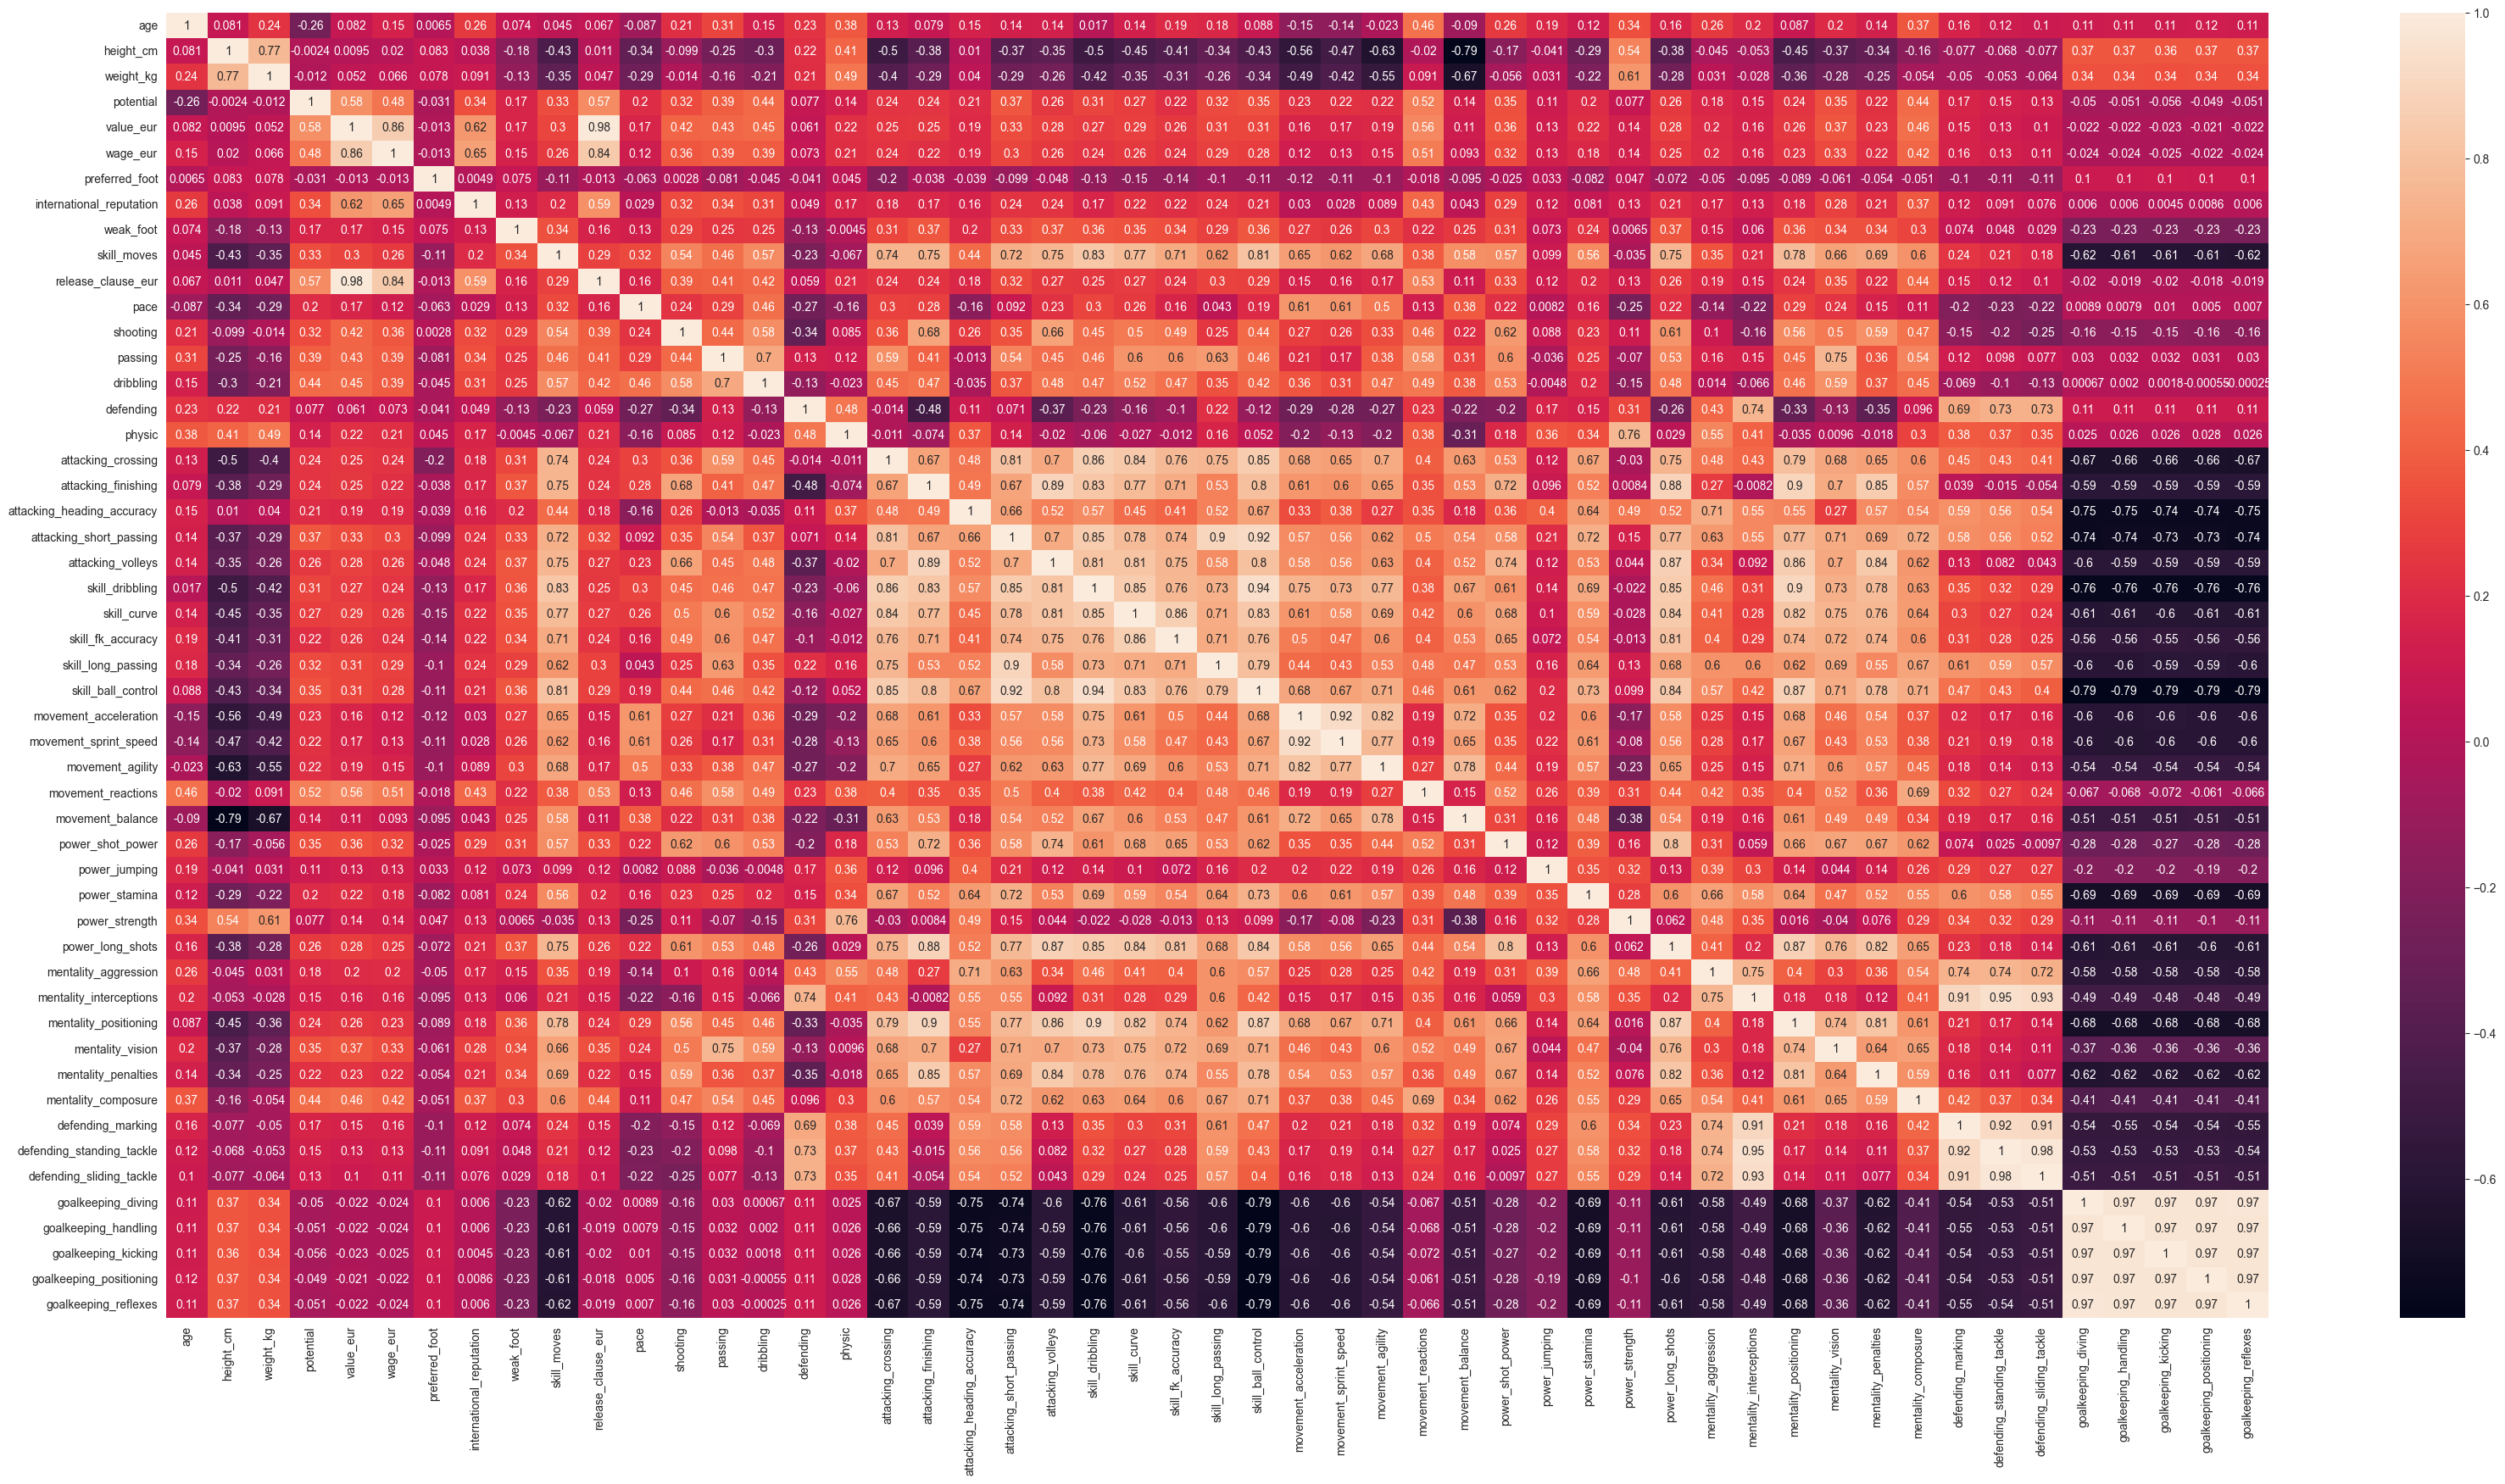

In [79]:
plt.figure(figsize=(40,20))
sns.heatmap(new_data.corr(),annot=True)

large number of highly correated values are present so dropping them

In [80]:
corr=new_data.corr()

In [81]:
threshold = 0.9  # Adjust the threshold as needed
highly_correlated_pairs = []

for i in range(len(corr.columns)):
    for j in range(i):
        if abs(corr.iloc[i, j]) >= threshold:
            col1 = corr.columns[i]
            col2 = corr.columns[j]
            highly_correlated_pairs.append((col1, col2, corr.iloc[i, j]))

# Print highly correlated pairs
column1=[]
column2=[]
print("Highly correlated pairs:")
for pair in highly_correlated_pairs:
    col1, col2, corr_value = pair
    column1.append(col1)
    column2.append(col1)
    print(f"{col1} and {col2}:     {corr_value}")

Highly correlated pairs:
release_clause_eur and value_eur:     0.9792329426446522
skill_ball_control and attacking_short_passing:     0.9177214980778275
skill_ball_control and skill_dribbling:     0.9434614773490161
movement_sprint_speed and movement_acceleration:     0.9237210802625271
mentality_positioning and skill_dribbling:     0.9045012084353609
defending_marking and mentality_interceptions:     0.9074007458131078
defending_standing_tackle and mentality_interceptions:     0.945286511461234
defending_standing_tackle and defending_marking:     0.9185929388205804
defending_sliding_tackle and mentality_interceptions:     0.9338937673291704
defending_sliding_tackle and defending_marking:     0.909153273965991
defending_sliding_tackle and defending_standing_tackle:     0.9758079529756446
goalkeeping_handling and goalkeeping_diving:     0.9713296037823226
goalkeeping_kicking and goalkeeping_diving:     0.9670569442914374
goalkeeping_kicking and goalkeeping_handling:     0.96650768067356

In [82]:
#dropping columns which is highly correlated with multiple columns in pair. 
# Keeping both features can introduce multicollinearity
new_data.drop(['release_clause_eur','defending_standing_tackle','goalkeeping_handling',
           'goalkeeping_positioning','goalkeeping_reflexes','mentality_interceptions','skill_ball_control',
           'movement_sprint_speed','defending_marking','mentality_positioning','attacking_short_passing',
           'goalkeeping_diving'],axis=1,inplace=True)

<AxesSubplot: >

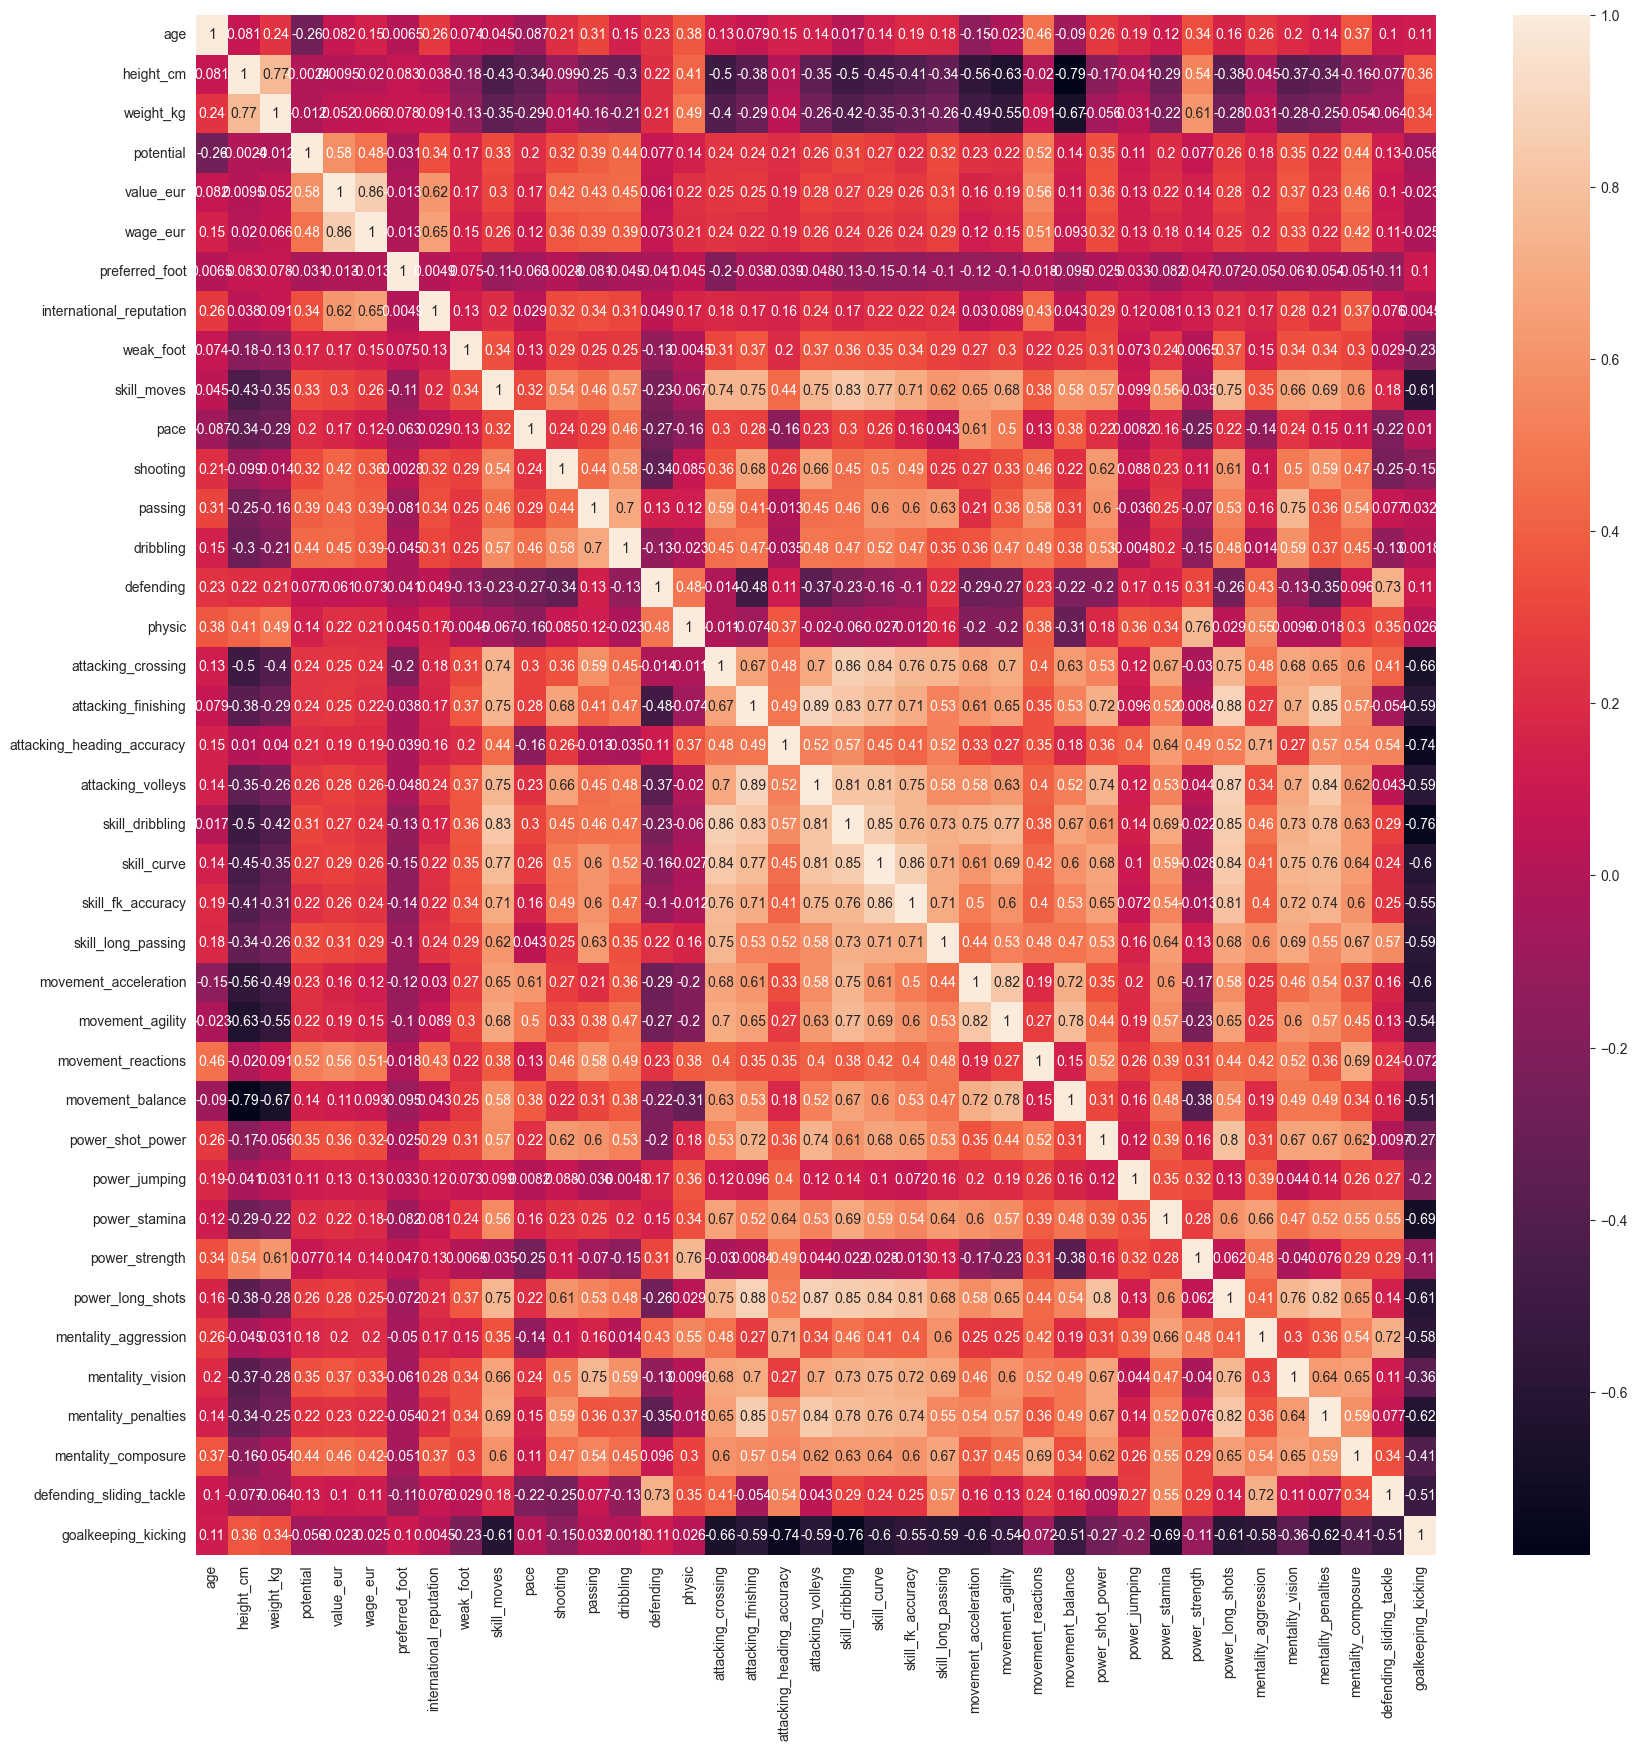

In [83]:
plt.figure(figsize=(20,20))
sns.heatmap(new_data.corr(),annot=True)

In [84]:
len(new_data.columns)

39

### PRINCIPLE COMPONENT ANALYSIS(PCA)
* It helps to reduce dimenssionality as preprocessed dataset has 39

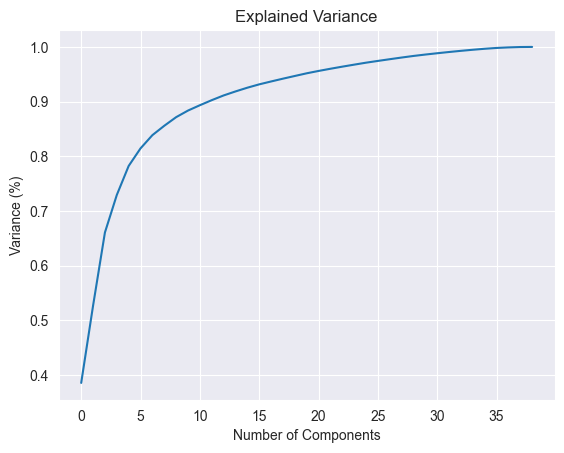

In [85]:
#getting the optimal number of pca
from sklearn.decomposition import PCA
pca = PCA()
principalComponents = pca.fit_transform(new_data)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Explained Variance')
plt.show()

* Here we are select 20 components because less varaince loss

In [86]:
#Select the components
pca = PCA(n_components=20)
fifa = pca.fit_transform(new_data)

# Make new dataframe
principle_df = pd.DataFrame(data=fifa,columns=['pca1','pca2','pca3','pca4','pca5','pca6','pca7','pca8','pca9','pca10',
                                              'pca11','pca12','pca13','pca14','pca15','pca16','pca17','pca18','pca19','pca20'])
principle_df.head()

pca1      pca2      pca3      pca4      pca5      pca6      pca7  \
0  2.097040 -0.177626  0.630217  0.953011 -0.615370 -0.285589 -0.297379   
1  1.871982 -0.471333 -0.426241  1.057267 -0.209056 -0.608674 -0.243695   
2  1.920717 -0.847759 -0.059704  0.538231 -0.638220 -0.243183 -0.440020   
3 -1.185632 -0.143602 -0.151221  0.627013 -0.632963 -0.457018 -0.299663   
4  1.759118 -0.728114 -0.119982  0.563514 -0.546283 -0.334437 -0.353969   

       pca8      pca9     pca10     pca11     pca12     pca13     pca14  \
0  0.266118 -0.431444  0.442198  0.199825 -0.022992  0.041293  0.161340   
1  0.197723 -0.361077  0.508707  0.052882 -0.124800 -0.094359  0.165386   
2  0.402448 -0.219337  0.587071  0.137738  0.006768  0.002384  0.223508   
3  0.286942 -0.433514  0.009917  0.486392 -0.137937  0.018656  0.083897   
4  0.129619 -0.192754  0.407920  0.234897  0.070617  0.058439  0.169068   

      pca15     pca16     pca17     pca18     pca19     pca20  
0  0.530016 -0.235603  0.323687 -0.036779  0.525434  0.501298  
1  0.286161 -0.197983  0.226643  0.088308  0.325180  0.572697  
2  0.485536 -0.143899  0.225564  0.146954  0.359674  0.552082  
3  0.268545  0.181554  0.302536  0.044515  0.142568  0.214097  
4  0.518344 -0.136123  0.208637 -0.004868  0.392839  0.365308

## Model Building

### KMeans Clustering

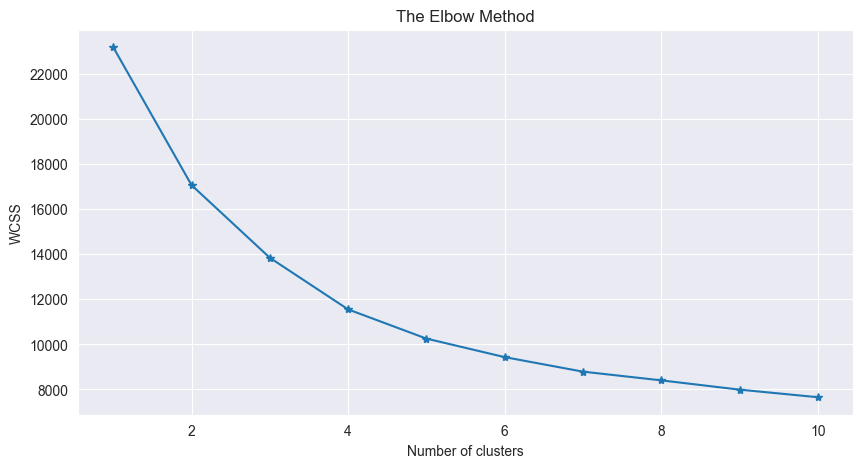

In [87]:
# finding optimal value for k
from sklearn.cluster import KMeans
kmeans = KMeans() # Object creation
wcss = [] # Create empty list

for i in range(1,11):
    kmeans = KMeans(n_clusters=i,random_state=42)
    kmeans = kmeans.fit(principle_df)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(10,5))
plt.plot(range(1,11),wcss,marker='*')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [88]:
# selecting 3 clusters

In [89]:
#initalize the cluster
kmeans_3 = KMeans(n_clusters=3,random_state=42)

# Fitting the data
kmeans_3.fit(principle_df)

# Get labels
labels=kmeans_3.labels_


### Evaluate model
* **Using silhouette Score with cluster 3** 

In [90]:
from sklearn.metrics import silhouette_score
silhou_score = silhouette_score(principle_df,labels)
print("Silhouette Score:",silhou_score)

Silhouette Score: 0.22021327013002967


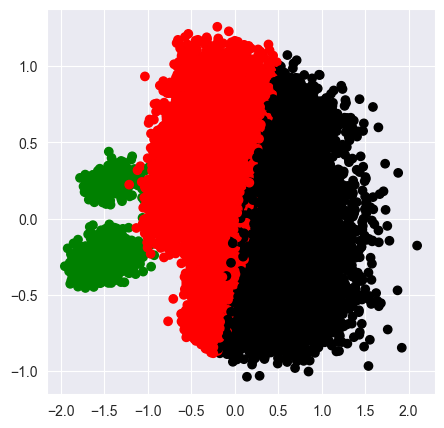

In [91]:
#Visualize the clusters created by model
plt.figure(figsize=(5,5))
color_schema=np.array(["red","green","black","orange","pink"])
plt.scatter(principle_df.pca1,principle_df.pca2,color=color_schema[labels])

* **Using silhouette Score with cluster 2** 

In [92]:
#initalize the cluster
kmeans_2 = KMeans(n_clusters=2,random_state=42)
# Fitting the data
kmeans_2.fit(principle_df)
# Get labels
labels=kmeans_2.labels_

In [93]:
from sklearn.metrics import silhouette_score
silhou_score = silhouette_score(principle_df,labels)
print("Silhouette Score:",silhou_score)

Silhouette Score: 0.2675559867239904


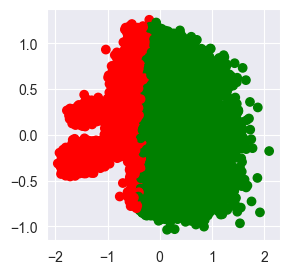

In [94]:
#Visualize the clusters created by model
plt.figure(figsize=(3,3))
color_schema=np.array(["red","green"])
plt.scatter(principle_df.pca1,principle_df.pca2,color=color_schema[kmeans_2.labels_])

* silhoutte score for 3 clusters is 0.22
* silhoutte score for 2 clusters is 0.26

### Insights
* the silhouette score for 2 clusters 0.26, which higher than 3 clusters that is 0.22 
* the clustering with 2 clusters is also appears good from the visualization of the data points.

* **Identify the dominating features in each cluster**

In [95]:
principle_df['Cluster'] = kmeans_2.fit_predict(principle_df)
kmeans_2.cluster_centers_

array([[-9.55412364e-01,  8.40510641e-02, -4.62588698e-02,
         3.67804650e-02, -3.57329851e-03, -1.56011633e-02,
        -1.28615532e-02,  1.65063536e-02, -1.98459260e-02,
         3.74388237e-02, -2.54941546e-02,  1.48178311e-02,
        -1.07593499e-02,  3.29391501e-03,  1.04352764e-02,
         9.86871876e-03, -4.37510464e-04,  8.12010979e-03,
         1.21556518e-02,  3.73988742e-03],
       [ 3.44887501e-01, -3.03409947e-02,  1.66986598e-02,
        -1.32771180e-02,  1.28989957e-03,  5.63175278e-03,
         4.64280046e-03, -5.95851096e-03,  7.16403942e-03,
        -1.35147742e-02,  9.20295318e-03, -5.34898326e-03,
         3.88394105e-03, -1.18904691e-03, -3.76695607e-03,
        -3.56243846e-03,  1.57933785e-04, -2.93122057e-03,
        -4.38798213e-03, -1.35003531e-03]])

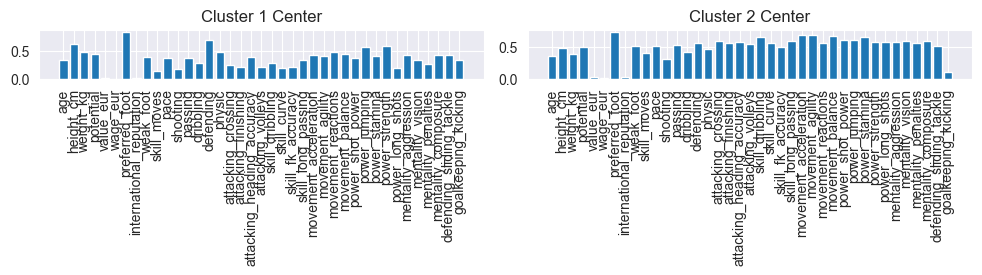


Cluster 0 (Size: 4835)
Dominating Features:
pca1    0.474641
pca2    0.337779
pca4    0.288436
pca3    0.281956
pca5    0.268299
dtype: float64

Cluster 1 (Size: 13443)
Dominating Features:
pca2    0.371749
pca3    0.360429
pca1    0.323552
pca4    0.229495
pca5    0.195258
dtype: float64


In [96]:
# Find the cluster centers (centroids)
n_clusters=2
original_feature_names = new_data.columns.tolist()

cluster_centers_pca = kmeans_2.cluster_centers_

cluster_centers_original = pca.inverse_transform(cluster_centers_pca)

plt.figure(figsize=(10, 6))
num=1
for i, cluster_center in enumerate(cluster_centers_original, 1):
    if num<=n_clusters:
        plt.subplot(3, 2, num)
        plt.bar(original_feature_names, cluster_center)  # Use original feature names
        plt.title(f'Cluster {i} Center')
        plt.xticks(rotation=90)
    num+=1
plt.tight_layout()
plt.show()
    
    
# Identify the dominating features in each cluster
for cluster_id in range(n_clusters):
    cluster_data = principle_df[principle_df['Cluster'] == cluster_id]
    cluster_size = len(cluster_data)
    cluster_center = cluster_centers_pca[cluster_id]

    # Calculate the feature importance within the cluster by comparing with cluster center
    feature_importance = abs(cluster_data.iloc[:, :-1] - cluster_center).mean().sort_values(ascending=False)

    print(f"\nCluster {cluster_id} (Size: {cluster_size})")
    print("Dominating Features:")
    print(feature_importance.head())  # Print the top dominating features


### Insights 
* **preferred_foot is main feature which played major role in clustering**